# **Business Understanding**

***Business Objectives***


* Visualization of the factors that would make customer churn
* Tailor retention efforts to address different customer groups' specific needs and preferences.
* enhance customer satisfaction and better their user experience
* identify and address issues that may cause customers to churn
* increase revenue and profitability

***Data Science Objectives***



*   Explaining customer churn prediction in telecom industry using tabular machine learning  models
* Implementing machine learning techniques for customer retention and churn prediction in telecommunications
* Customer churn prediction in telecom sector using machine learning techniques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df_test = pd.read_csv("churn-bigml-20.csv")
df_train = pd.read_csv("churn-bigml-80.csv")
print(df_test.shape)
print(df_train.shape)

(667, 20)
(2666, 20)


In [ ]:
df_test.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [ ]:
df_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


we combine the training dataframe and the testing dataframe to clean and prepare our data at the same time
we add "is_train" column to distinguish where the data came from after we combine the 2 dataframes

In [ ]:
df_test["is_train"]=0
df_train["is_train"]=1
df_combined = pd.concat([df_train, df_test], ignore_index = True)
df_combined

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,is_train
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,...,13.23,247.6,94,11.14,11.5,7,3.11,2,False,0
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,...,17.33,229.5,73,10.33,8.1,3,2.19,1,False,0
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,...,7.23,210.1,134,9.45,13.2,8,3.56,3,False,0
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,...,16.80,193.7,82,8.72,11.6,4,3.13,1,False,0


check for null values

In [ ]:
print(df_combined.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
is_train                  0
dtype: int64


check for duplicated values

In [ ]:
print(df_combined.duplicated().sum())

0


box plot to check for outliers

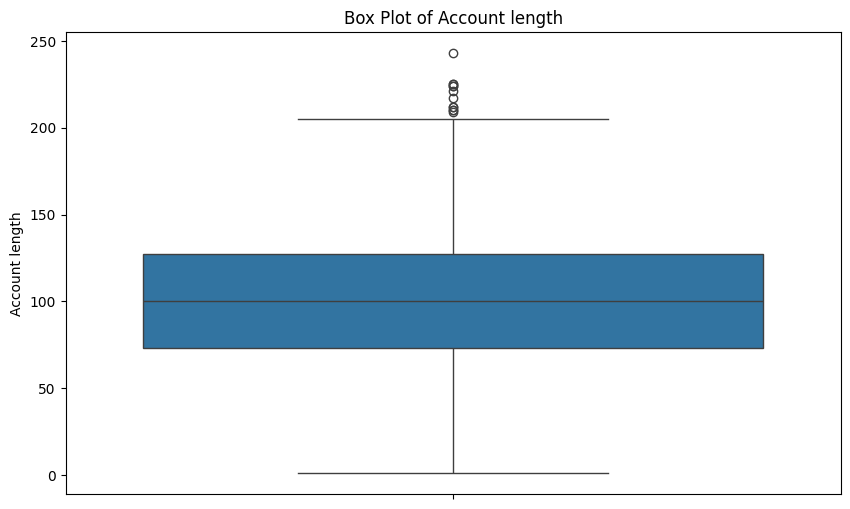

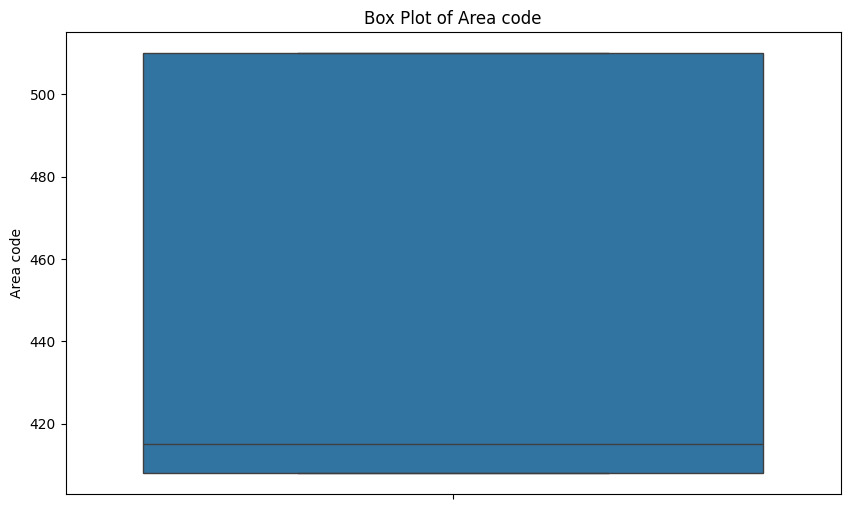

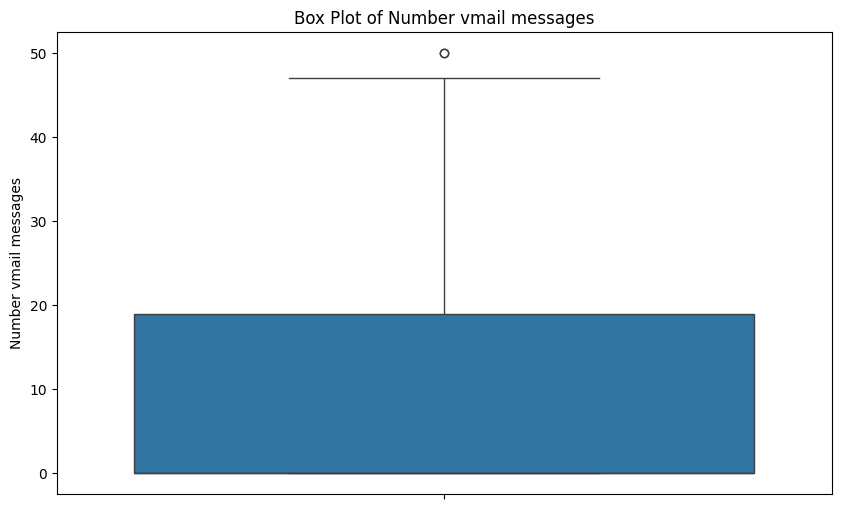

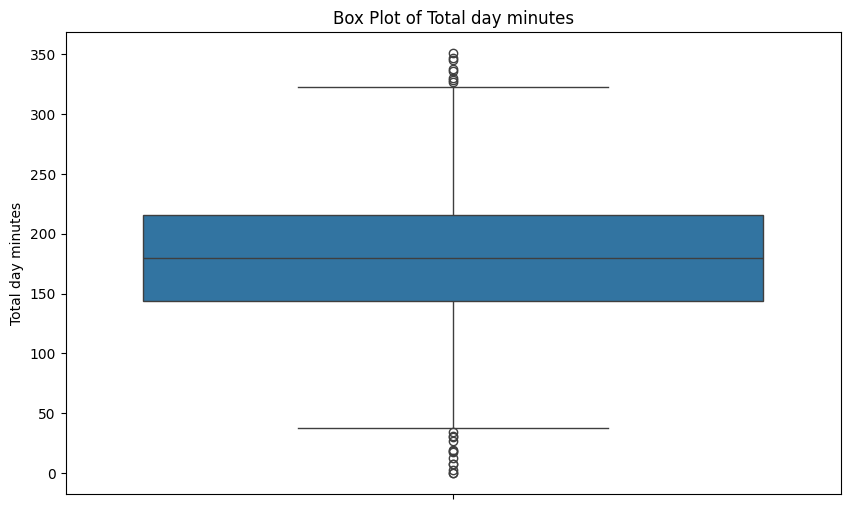

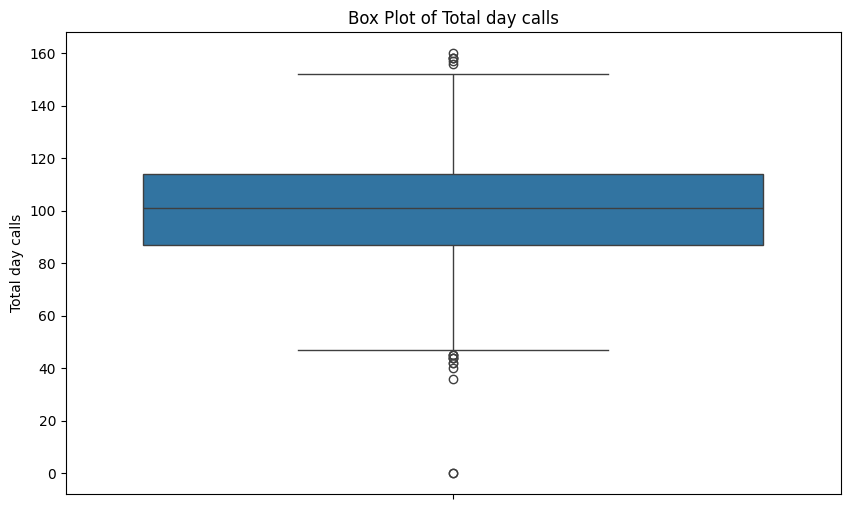

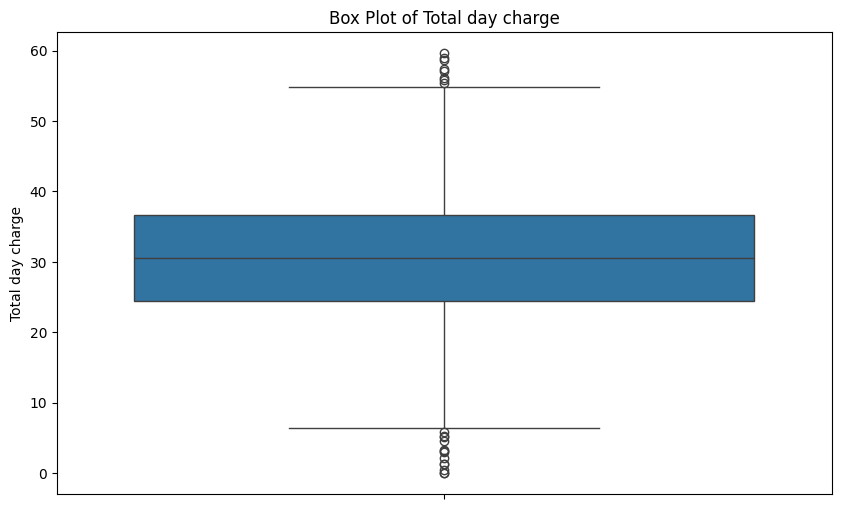

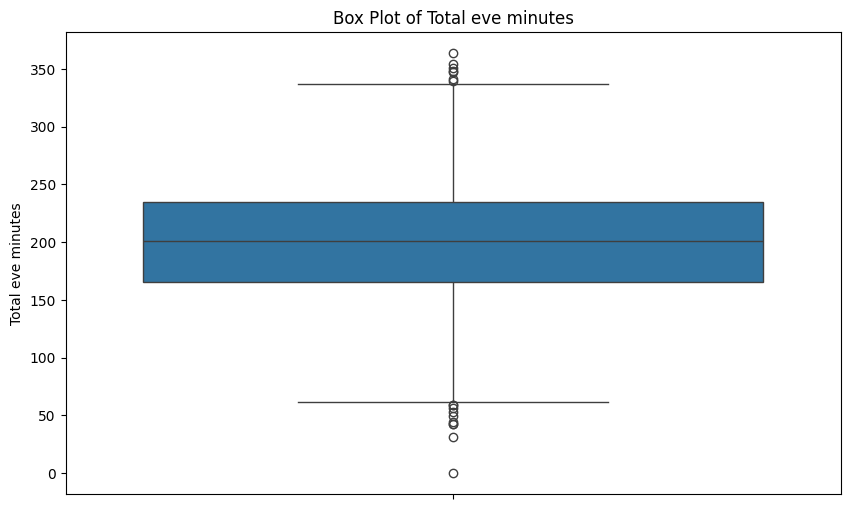

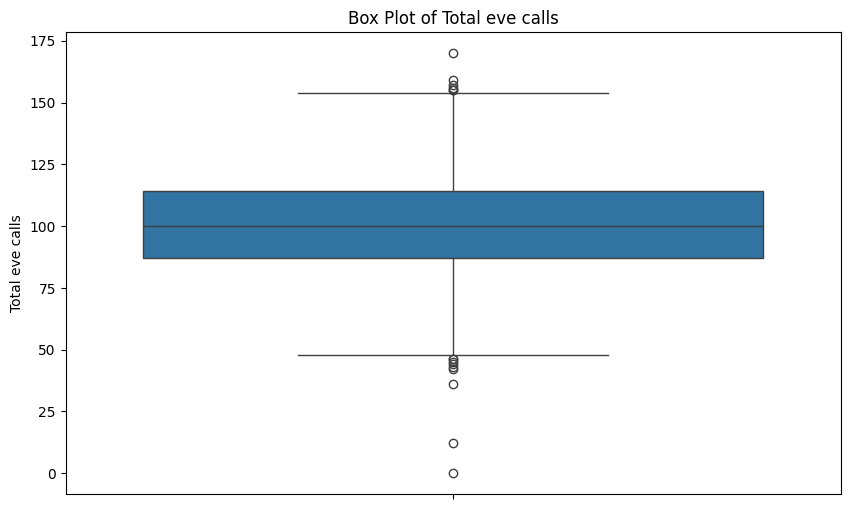

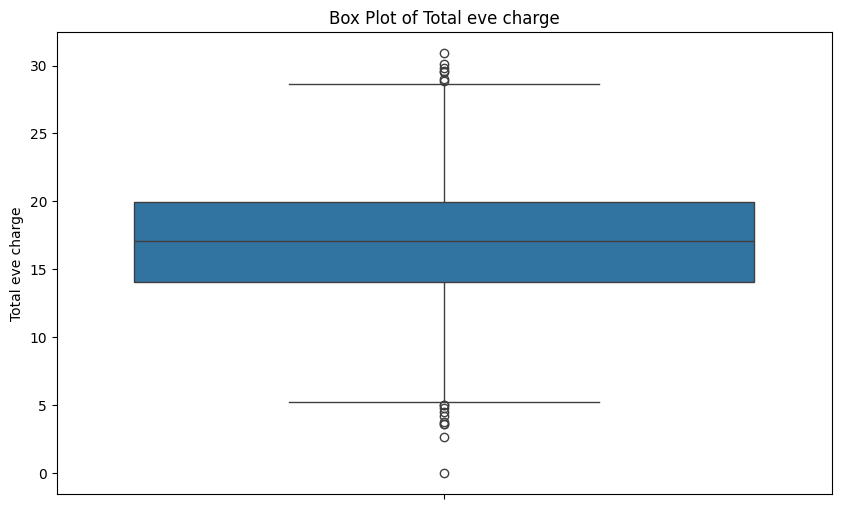

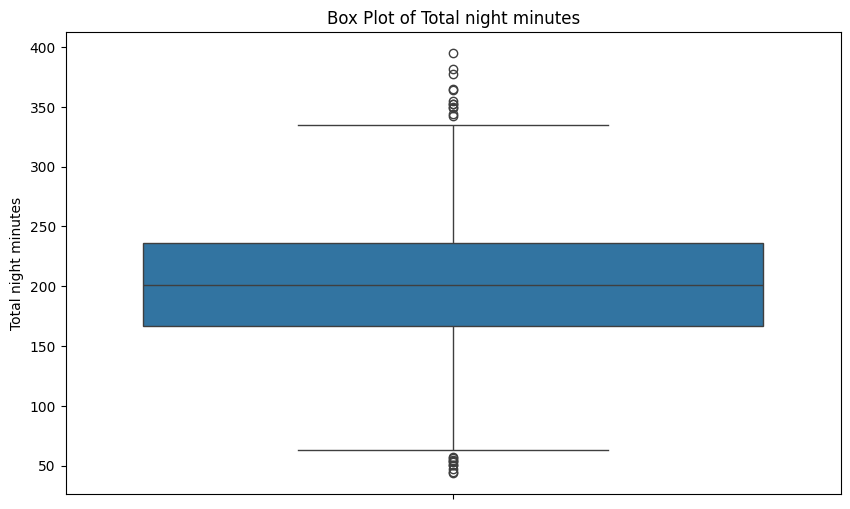

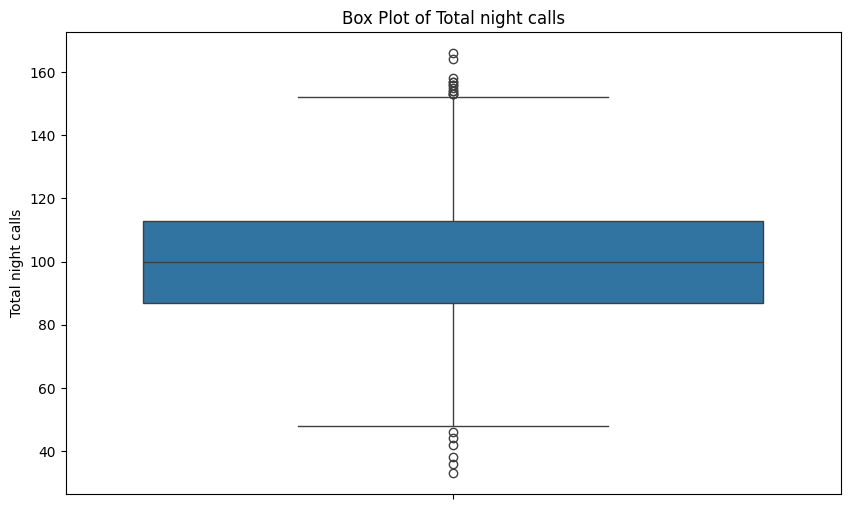

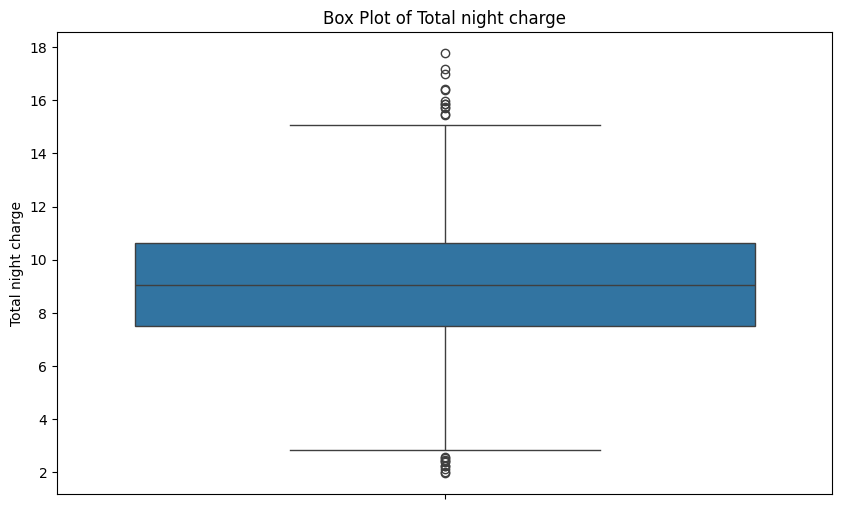

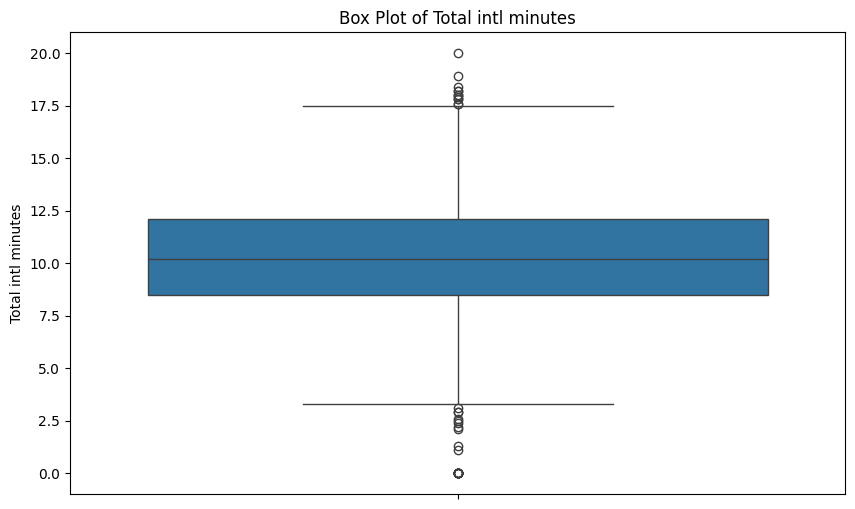

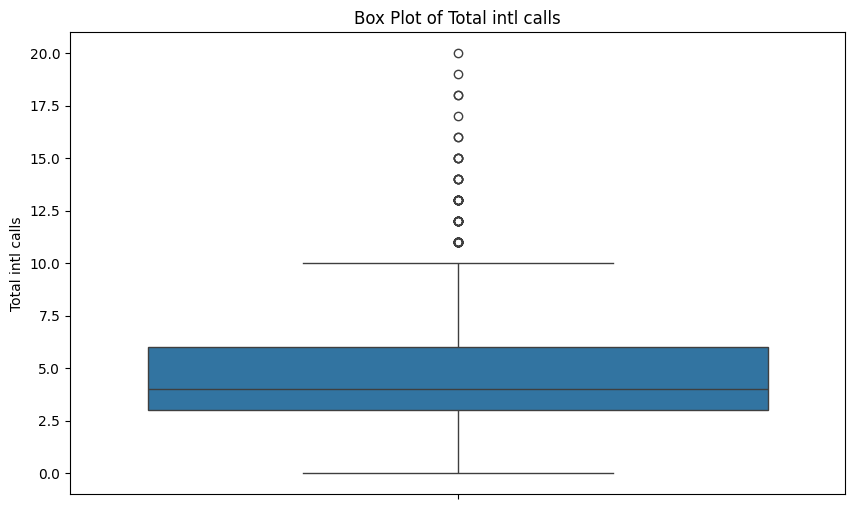

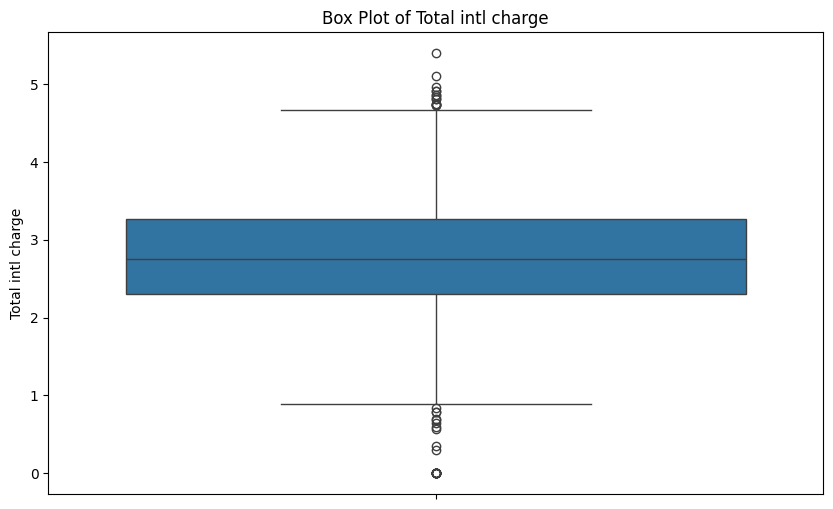

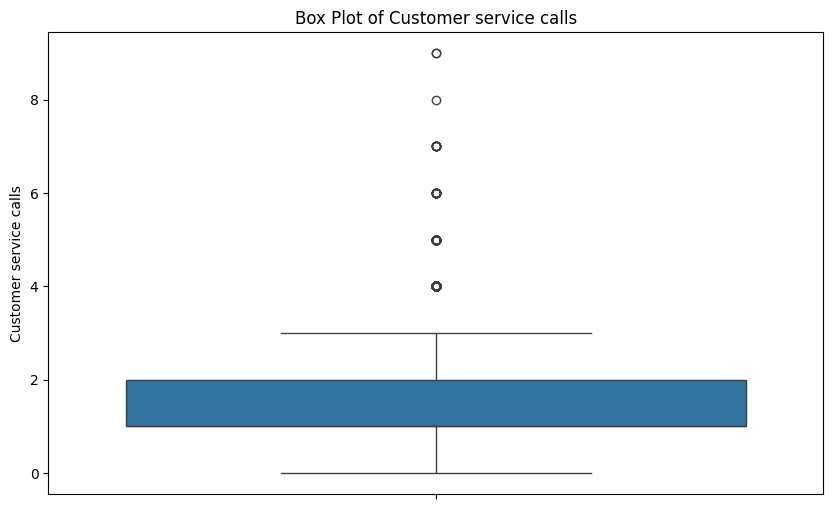

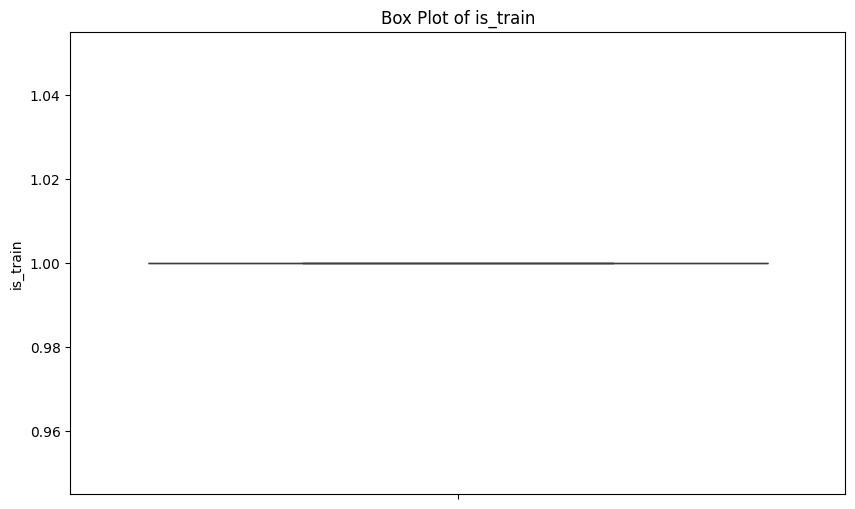

In [ ]:
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Generate box plots for all numeric features (without categorizing by Churn)
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_train[column])
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()

we found outliers but the values were explainable so we are keeping them

we checked for the distribution churned and non-churned clients in the data

In [ ]:
print(df_train['Churn'].value_counts())
print(df_train['Churn'].mean() * 100)

Churn
False    2278
True      388
Name: count, dtype: int64
14.553638409602401


we found a huge imbalance between the 2 modalities so we need to keep this in mind later (we will approach the problem by applying smote and enn)

In [ ]:
print(len(df_train['State'].unique()))

51


we found that the state column has 51 different values so we will reduce the number of modalities but keeping the information provided by this column

In [ ]:
print(df_combined.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'is_train'],
      dtype='object')


we are making a new column called "Region" that will replace "State"
the values of "Region" are : ["South","West","Northeast","Midwest"]
we are also changing the boolean columns into binary columns

In [ ]:

state_to_region = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'South', 'FL': 'South',
    'GA': 'South', 'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'KY': 'South', 'LA': 'South',
    'ME': 'Northeast', 'MD': 'South', 'MA': 'Northeast', 'MI': 'Midwest',
    'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest', 'MT': 'West',
    'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast',
    'NM': 'West', 'NY': 'Northeast', 'NC': 'South', 'ND': 'Midwest',
    'OH': 'Midwest', 'OK': 'South', 'OR': 'West', 'PA': 'Northeast',
    'RI': 'Northeast', 'SC': 'South', 'SD': 'Midwest', 'TN': 'South',
    'TX': 'South', 'UT': 'West', 'VT': 'Northeast', 'VA': 'South',
    'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West'
}

binary_columns = ["International plan","Voice mail plan"]
df_combined[binary_columns] = df_combined[binary_columns].apply(lambda x: x.map({"Yes": 1, "No": 0}))


df_combined['Region'] = df_combined['State'].map(state_to_region)
df_combined.drop('State', axis=1, inplace=True)

df_combined

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,is_train,Region
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,False,1,Midwest
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,False,1,Midwest
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,False,1,Northeast
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,False,1,Midwest
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,False,1,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,415,0,1,26,137.1,88,23.31,155.7,125,...,247.6,94,11.14,11.5,7,3.11,2,False,0,Midwest
3329,106,408,0,1,29,83.6,131,14.21,203.9,131,...,229.5,73,10.33,8.1,3,2.19,1,False,0,South
3330,60,415,0,0,0,193.9,118,32.96,85.0,110,...,210.1,134,9.45,13.2,8,3.56,3,False,0,Northeast
3331,159,415,0,0,0,169.8,114,28.87,197.7,105,...,193.7,82,8.72,11.6,4,3.13,1,False,0,South


applied one hot encoding on "Region" and "Area code"

In [ ]:
df_combined = pd.get_dummies(df_combined, columns=["Region"], drop_first=False)
df_combined = pd.get_dummies(df_combined, columns=["Area code"], drop_first = False)
dummy_columns =list(df_combined.columns[df_combined.columns.str.contains("Region_")]) + list(df_combined.columns[df_combined.columns.str.contains("Area code_")])
print(dummy_columns)

df_combined[dummy_columns] = df_combined[dummy_columns].apply(lambda x : x.map({True : 1, False : 0}))


['Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_West', 'Area code_408', 'Area code_415', 'Area code_510']


In [ ]:
df_combined

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,Customer service calls,Churn,is_train,Region_Midwest,Region_Northeast,Region_South,Region_West,Area code_408,Area code_415,Area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,1,False,1,1,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,1,False,1,1,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,False,1,0,1,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,2,False,1,1,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,3,False,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,0,1,26,137.1,88,23.31,155.7,125,13.23,...,2,False,0,1,0,0,0,0,1,0
3329,106,0,1,29,83.6,131,14.21,203.9,131,17.33,...,1,False,0,0,0,1,0,1,0,0
3330,60,0,0,0,193.9,118,32.96,85.0,110,7.23,...,3,False,0,0,1,0,0,0,1,0
3331,159,0,0,0,169.8,114,28.87,197.7,105,16.80,...,1,False,0,0,0,1,0,0,1,0


# **PCA** 1st try

We tried taking multiple approaches to apply pca on our data, we aimed to gradually increase the results and we achieved that

first we applied pca on the entirety of our data

Principal Component 1: Explained Variance = 2.0777, Cumulative Variance = 2.0777
Principal Component 2: Explained Variance = 2.0609, Cumulative Variance = 4.1386
Principal Component 3: Explained Variance = 2.0274, Cumulative Variance = 6.1660
Principal Component 4: Explained Variance = 1.9970, Cumulative Variance = 8.1630
Principal Component 5: Explained Variance = 1.1963, Cumulative Variance = 9.3593
Principal Component 6: Explained Variance = 1.1794, Cumulative Variance = 10.5386
Principal Component 7: Explained Variance = 1.1710, Cumulative Variance = 11.7097
Principal Component 8: Explained Variance = 1.1610, Cumulative Variance = 12.8707
Principal Component 9: Explained Variance = 1.1424, Cumulative Variance = 14.0131
Principal Component 10: Explained Variance = 1.1164, Cumulative Variance = 15.1295
Principal Component 11: Explained Variance = 1.1095, Cumulative Variance = 16.2390
Principal Component 12: Explained Variance = 1.0922, Cumulative Variance = 17.3313
Principal Componen

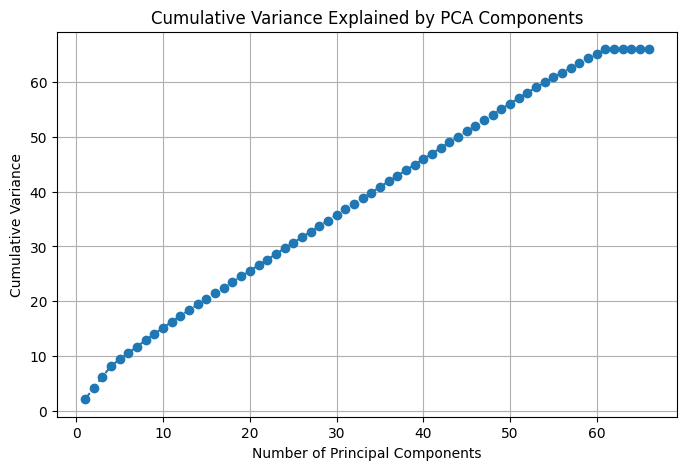

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("churn-bigml-80.csv")
binary_columns = ["International plan","Voice mail plan"]
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({"Yes": 1, "No": 0}))

df = pd.get_dummies(df, columns=["State"], drop_first=True)

X = df.drop(columns=["Churn"])
continious_columns = [col for col in X.columns if col not in binary_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[continious_columns])

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_
cumulative_variance = explained_variance.cumsum()

for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"Principal Component {i}: Explained Variance = {var:.4f}, Cumulative Variance = {cum_var:.4f}")
plt.figure(figsize=(8,5))
plt.plot(range(1,len(explained_variance)+1), cumulative_variance, marker="o", linestyle="--")
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()


there will be no dimensionality reduction from this pca because the first 2 components don't have enough explained variance.

in this 2nd try we apply pca on the data where we apply the change to the region column and boolean columns

Principal Component 1: Explained Variance = 2.0534, Cumulative Variance = 2.0534
Principal Component 2: Explained Variance = 2.0283, Cumulative Variance = 4.0817
Principal Component 3: Explained Variance = 1.9869, Cumulative Variance = 6.0686
Principal Component 4: Explained Variance = 1.9616, Cumulative Variance = 8.0301
Principal Component 5: Explained Variance = 1.4255, Cumulative Variance = 9.4557
Principal Component 6: Explained Variance = 1.2479, Cumulative Variance = 10.7036
Principal Component 7: Explained Variance = 1.0720, Cumulative Variance = 11.7756
Principal Component 8: Explained Variance = 1.0479, Cumulative Variance = 12.8235
Principal Component 9: Explained Variance = 1.0017, Cumulative Variance = 13.8252
Principal Component 10: Explained Variance = 0.9968, Cumulative Variance = 14.8221
Principal Component 11: Explained Variance = 0.9880, Cumulative Variance = 15.8101
Principal Component 12: Explained Variance = 0.9711, Cumulative Variance = 16.7811
Principal Componen

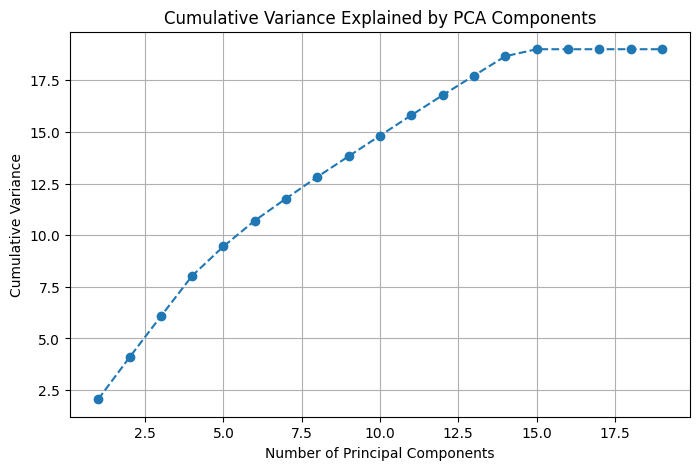

In [ ]:
state_to_region = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'South', 'FL': 'South',
    'GA': 'South', 'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'KY': 'South', 'LA': 'South',
    'ME': 'Northeast', 'MD': 'South', 'MA': 'Northeast', 'MI': 'Midwest',
    'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest', 'MT': 'West',
    'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast',
    'NM': 'West', 'NY': 'Northeast', 'NC': 'South', 'ND': 'Midwest',
    'OH': 'Midwest', 'OK': 'South', 'OR': 'West', 'PA': 'Northeast',
    'RI': 'Northeast', 'SC': 'South', 'SD': 'Midwest', 'TN': 'South',
    'TX': 'South', 'UT': 'West', 'VT': 'Northeast', 'VA': 'South',
    'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West'
}
df = pd.read_csv("churn-bigml-80.csv")
binary_columns = ["International plan","Voice mail plan"]
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({"Yes": 1, "No": 0}))

df['Region'] = df['State'].map(state_to_region)
df.drop('State', axis=1, inplace=True)

df = pd.get_dummies(df, columns=["Region"], drop_first=True)

X = df.drop(columns=["Churn"])
continious_columns = [col for col in X.columns if col not in binary_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[continious_columns])

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_
cumulative_variance = explained_variance.cumsum()

for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"Principal Component {i}: Explained Variance = {var:.4f}, Cumulative Variance = {cum_var:.4f}")
plt.figure(figsize=(8,5))
plt.plot(range(1,len(explained_variance)+1), cumulative_variance, marker="o", linestyle="--")
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()

there is a slight increase in the explained variance by the first 2 components but its still not enough

now  we split the data to their original origin while applying our changes

In [ ]:
df_train_featured = df_combined[df_combined['is_train']==1]
df_test_featured = df_combined[df_combined['is_train']==0]

We use the correlation matrix to understand te correlation of the variables between each other and with the target variable

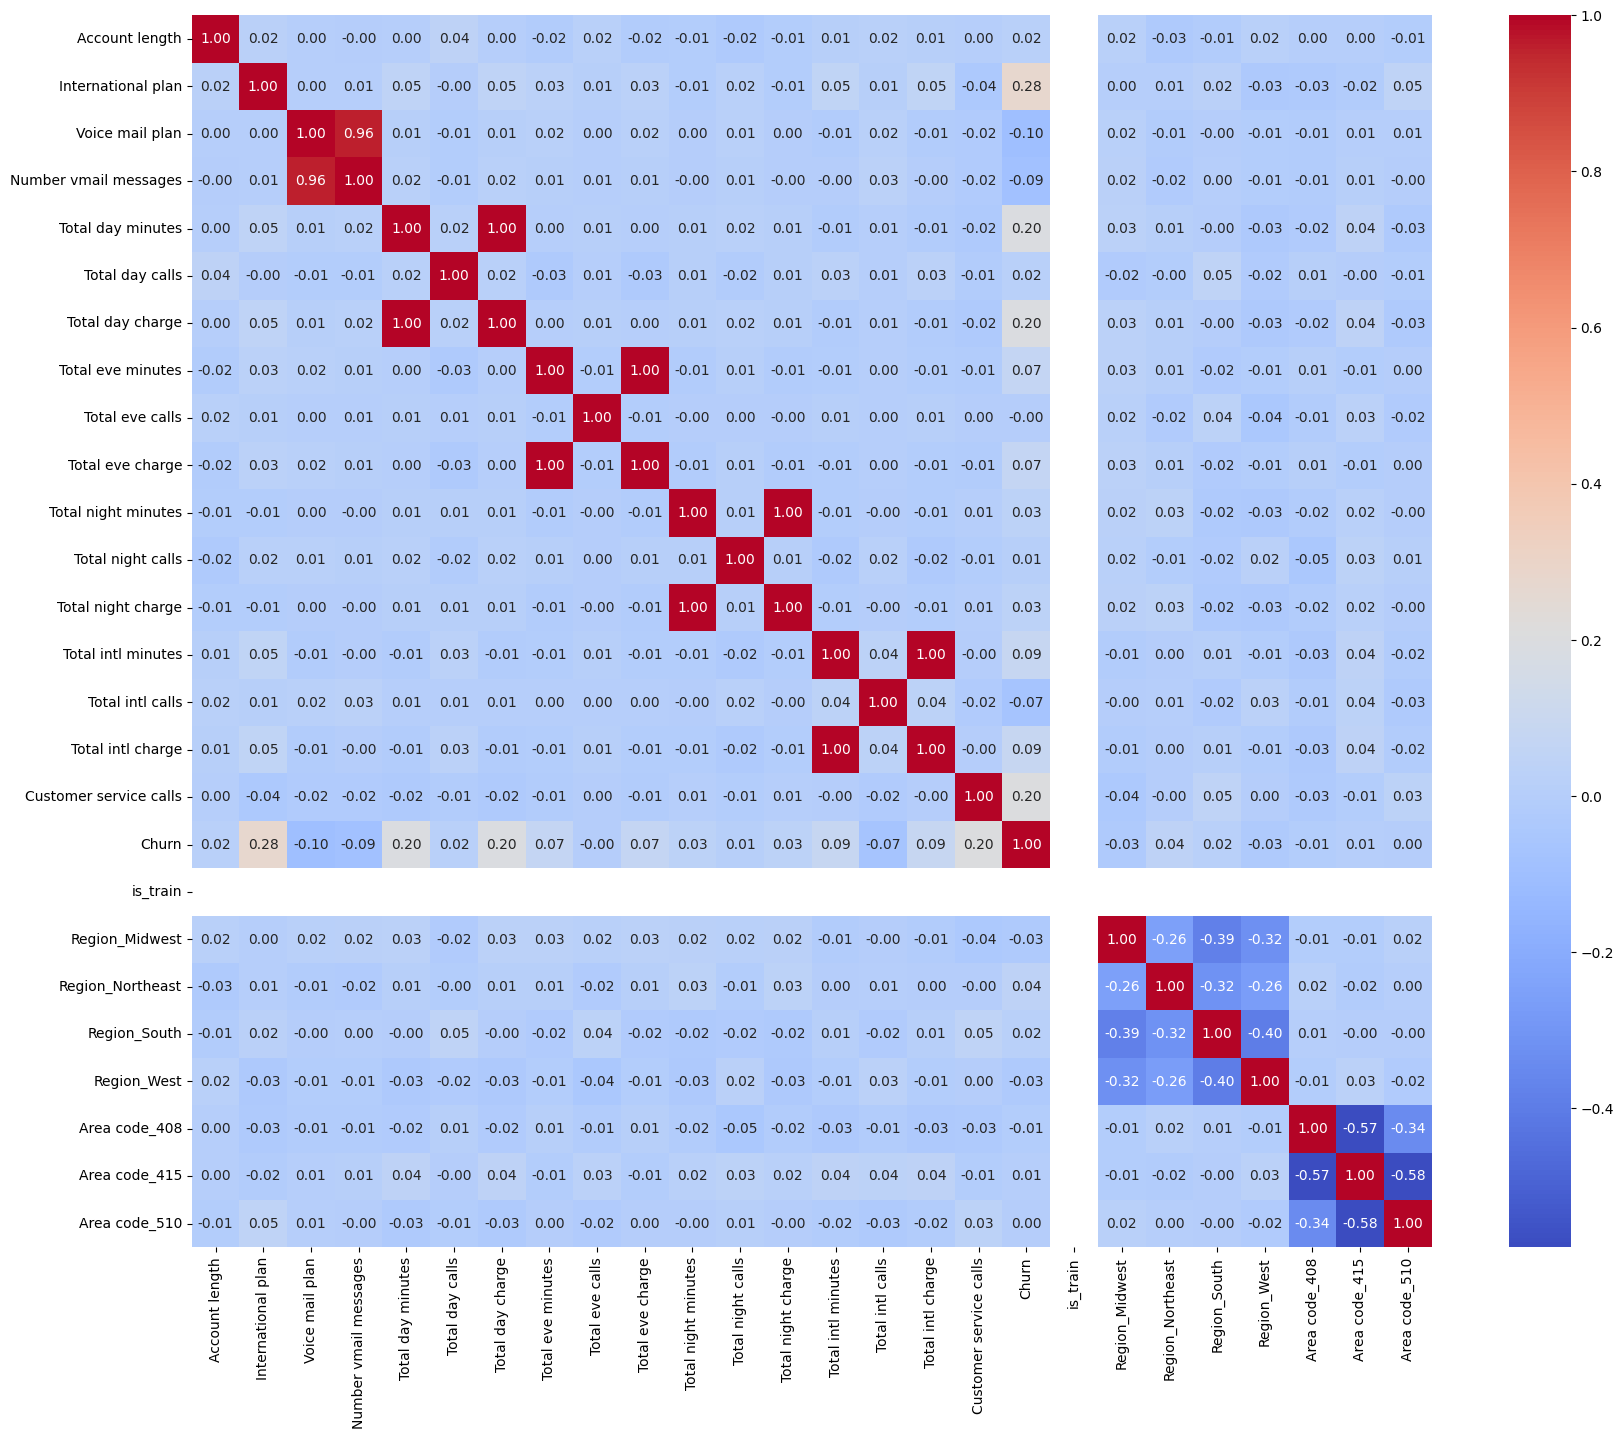

In [ ]:
corr_matrix = df_train_featured.corr(method='pearson')
plt.figure(figsize=(20, 16))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* we see a strong correlation between (voice mail plan,number vmail message)(total day charge,total day minutes)(total eve charge,total eve minutes)(total night charge,total night minutes)(total intl charge,total intl minutes)
* from the matric we can see a very low correlation between the target variable churn and (area_codes, totale night calls, total eve calls, account length)

* we drop one of the strongly correlated descriptive columns.
* we are dropping the one that has less correlation with the target variable

In [ ]:
dropped_columns1 = []
print("corr voice mail plan: ",corr_matrix['Churn']['Voice mail plan'])
print("corr number vmail messages: ",corr_matrix['Churn']['Number vmail messages'])
#we drop Number vmail messages
dropped_columns1.append('Number vmail messages')

print("corr Total day minutes: ",corr_matrix['Churn']['Total day minutes'])
print("corr Total day charge: ",corr_matrix['Churn']['Total day charge'])
#we drop total day minutes
dropped_columns1.append('Total day minutes')

print("corr Total night minutes: ",corr_matrix['Churn']['Total night minutes'])
print("corr Total night charge: ",corr_matrix['Churn']['Total night charge'])
#we drop total day charge
dropped_columns1.append('Total night charge')

print("corr Total eve minutes: ",corr_matrix['Churn']['Total eve minutes'])
print("corr Total eve charge: ",corr_matrix['Churn']['Total eve charge'])
#we drop total eve charge
dropped_columns1.append('Total eve charge')

print("corr Total intl minutes: ",corr_matrix['Churn']['Total intl minutes'])
print("corr Total intl charge: ",corr_matrix['Churn']['Total intl charge'])
#we drop total eve charge
#dropped_columns1.append('Total intl minutes')

dropped_columns1.extend(['Area code_408','Area code_510','Area code_415','Total night calls','Total eve calls','Total day calls','Account length','Total night minutes'])

corr voice mail plan:  -0.09929060228146377
corr number vmail messages:  -0.08647414333110323
corr Total day minutes:  0.19568792621993664
corr Total day charge:  0.19568892963967652
corr Total night minutes:  0.03363909290341865
corr Total night charge:  0.03363540502024018
corr Total eve minutes:  0.07290626808163216
corr Total eve charge:  0.07289326915576907
corr Total intl minutes:  0.08620377131557069
corr Total intl charge:  0.08621611819915354


we create dataframe with the new set of columns

In [ ]:
df_train_featured_dropped_columns1 = df_train_featured
df_train_featured_dropped_columns1 = df_train_featured_dropped_columns1.drop(dropped_columns1, axis=1)

print(df_train_featured.columns)
print(df_train_featured_dropped_columns1.columns)

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn', 'is_train',
       'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_West',
       'Area code_408', 'Area code_415', 'Area code_510'],
      dtype='object')
Index(['International plan', 'Voice mail plan', 'Total day charge',
       'Total eve minutes', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn', 'is_train',
       'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_West'],
      dtype='object')


**3rd pca try**
we apply pca on the new dataframe

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


df_train_featured_dropped_columns1['Churn'].apply(lambda x: 1 if x == True else 0)

# Step 1: Select only the numeric columns
df_numeric = df_train_featured_dropped_columns1.select_dtypes(include=['float64', 'int64'])

# Step 2: Standardize the data
scaler = StandardScaler()
continious_columns = [col for col in df_numeric.columns if col not in binary_columns]
df_scaled = scaler.fit_transform(df_numeric[continious_columns])

# Step 3: Fit PCA to the data (without specifying the number of components to keep all)
pca = PCA()  # No 'n_components' argument to keep all components
df_pca = pca.fit_transform(df_scaled)

# Step 4: Explained Variance - how much variance each component explains
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Step 5: Component Loadings (weights of the features in each component)
print("\nPCA Component Loadings (Feature Weights):")
print(pca.components_)

# Step 6: Convert the result to a DataFrame for easier viewing
df_pca_df = pd.DataFrame(df_pca, columns=[f'PCA_{i+1}' for i in range(df_pca.shape[1])])

# Optional: Append PCA results to the original DataFrame
df_train_featured_dropped_columns_with_pca = pd.concat([df_train_featured_dropped_columns1, df_pca_df], axis=1)

# Show the first few rows of the PCA components DataFrame
print("\nPCA Components DataFrame:")
print(df_pca_df.head())


Explained Variance Ratio:
[2.00418773e-01 1.43149086e-01 1.33393341e-01 1.23494010e-01
 1.02552861e-01 9.95754720e-02 9.84665794e-02 9.66833889e-02
 2.26575550e-03 7.33009686e-07 0.00000000e+00]

PCA Component Loadings (Feature Weights):
[[-1.57750513e-02 -1.09708257e-02  7.05417668e-01  5.15428373e-02
   7.05418299e-01 -2.21915267e-03  0.00000000e+00 -2.89433106e-02
   2.99996230e-03  2.81891578e-02 -9.93951494e-03]
 [-1.49674393e-02 -6.54951931e-02 -2.37373400e-02 -7.99664901e-02
  -2.37293973e-02  1.28450828e-01  0.00000000e+00 -3.62747586e-01
  -1.46213248e-01  8.14644419e-01 -3.93517345e-01]
 [-1.38086182e-01 -8.31812110e-02 -1.27496395e-02  4.77080898e-02
  -1.27937718e-02  9.31117909e-02  2.77555756e-17 -6.77590702e-01
  -5.81642487e-02  9.49169189e-03  7.07204821e-01]
 [ 3.50801941e-02  2.45412497e-02 -8.04925843e-03  2.21798730e-03
  -8.07266540e-03  1.19742359e-02  5.55111512e-17 -3.65074583e-01
   8.80363390e-01 -1.33471805e-01 -2.67871190e-01]
 [-5.17305419e-01 -1.70671171e

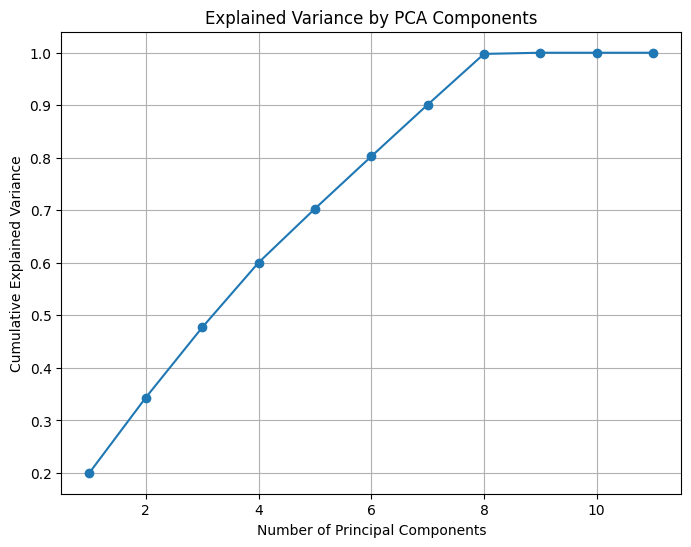

In [ ]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


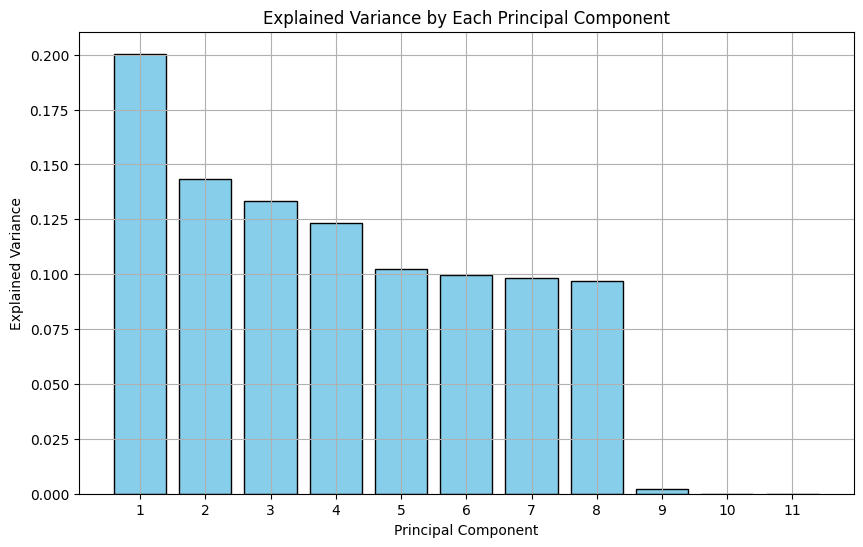

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot of the explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='skyblue', edgecolor='black')

# Labeling
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Each Principal Component')

# Optionally, set a log scale for better readability if variance values are very different
# plt.yscale('log')

plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensure each component is labeled
plt.grid(True)
plt.show()


In [ ]:
# Sum of the explained variance for the first two components
explained_variance_sum = sum(pca.explained_variance_ratio_[:2])

# Print the result
print(f"Sum of explained variance for the first two components: {explained_variance_sum}")


Sum of explained variance for the first two components: 0.3435678588688137


we apply pca on the same data but only the churned clients to try and understand their behaviour

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_churn = df_train_featured_dropped_columns1[df_train_featured_dropped_columns1["Churn"]==True]


# Step 1: Select only the numeric columns
df_numeric = df_churn.select_dtypes(include=['float64', 'int64'])

# Step 2: Standardize the data
scaler = StandardScaler()
continious_columns = [col for col in df_numeric.columns if col not in binary_columns]
df_scaled = scaler.fit_transform(df_numeric[continious_columns])

# Step 3: Fit PCA to the data (without specifying the number of components to keep all)
pca = PCA()  # No 'n_components' argument to keep all components
df_pca = pca.fit_transform(df_scaled)

# Step 4: Explained Variance - how much variance each component explains
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Step 5: Component Loadings (weights of the features in each component)
print("\nPCA Component Loadings (Feature Weights):")
print(pca.components_)

# Step 6: Convert the result to a DataFrame for easier viewing
df_pca_df = pd.DataFrame(df_pca, columns=[f'PCA_{i+1}' for i in range(df_pca.shape[1])])

# Optional: Append PCA results to the original DataFrame
df_train_featured_dropped_columns_with_pca = pd.concat([df_train_featured_dropped_columns1, df_pca_df], axis=1)

# Show the first few rows of the PCA components DataFrame
print("\nPCA Components DataFrame:")
print(df_pca_df.head())


Explained Variance Ratio:
[2.06891765e-01 1.63009816e-01 1.42479365e-01 1.26500725e-01
 1.23363120e-01 9.77466210e-02 8.02106059e-02 5.80674299e-02
 1.72986544e-03 6.86919192e-07 0.00000000e+00]

PCA Component Loadings (Feature Weights):
[[ 1.19010531e-01  1.26814429e-01  6.67619638e-01  1.34456203e-01
   6.67671989e-01 -2.01452622e-01 -0.00000000e+00 -1.24904379e-02
   5.81067301e-02  5.96563073e-02 -1.11802598e-01]
 [ 5.65213664e-01  3.85117053e-01 -1.65640341e-01  1.02388712e-01
  -1.65324301e-01 -5.16953510e-01  1.38777878e-17  3.29266192e-01
   6.03860232e-02 -2.92658553e-01 -4.48711193e-02]
 [ 1.35105077e-01  2.13690849e-01 -1.12422478e-01  1.29542429e-01
  -1.12447901e-01 -1.08173921e-01 -1.11022302e-16 -1.12170175e-01
  -3.79076086e-01  7.60257795e-01 -3.84764753e-01]
 [-2.38592839e-03 -8.09855426e-02 -7.77061746e-02 -4.34562599e-02
  -7.77301719e-02 -1.31368520e-02 -2.19876201e-16 -1.72075079e-01
   7.50900354e-01  4.10801942e-02 -6.19794837e-01]
 [-2.05397152e-01 -1.35904971e

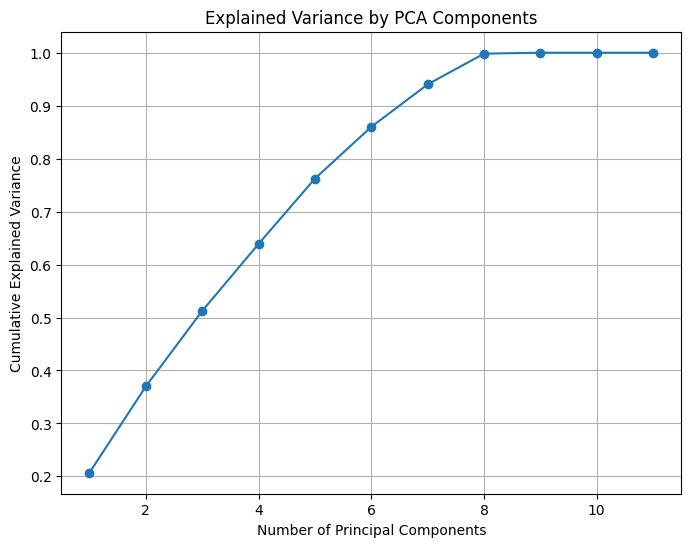

In [ ]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


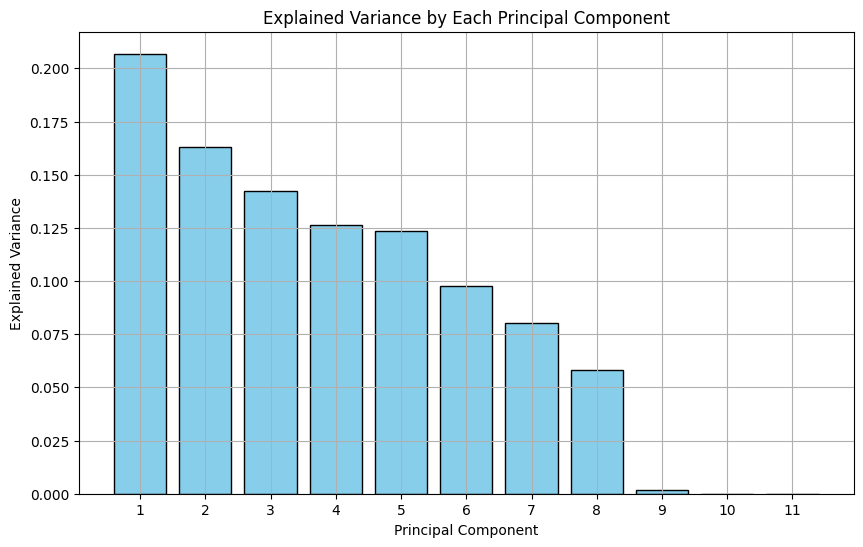

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot of the explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='skyblue', edgecolor='black')

# Labeling
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Each Principal Component')

# Optionally, set a log scale for better readability if variance values are very different
# plt.yscale('log')

plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensure each component is labeled
plt.grid(True)
plt.show()


In [ ]:
# Sum of the explained variance for the first two components
explained_variance_sum = sum(pca.explained_variance_ratio_[:2])

# Print the result
print(f"Sum of explained variance for the first two components: {explained_variance_sum}")


Sum of explained variance for the first two components: 0.369901581001786


we draw the correlation circle of this pca

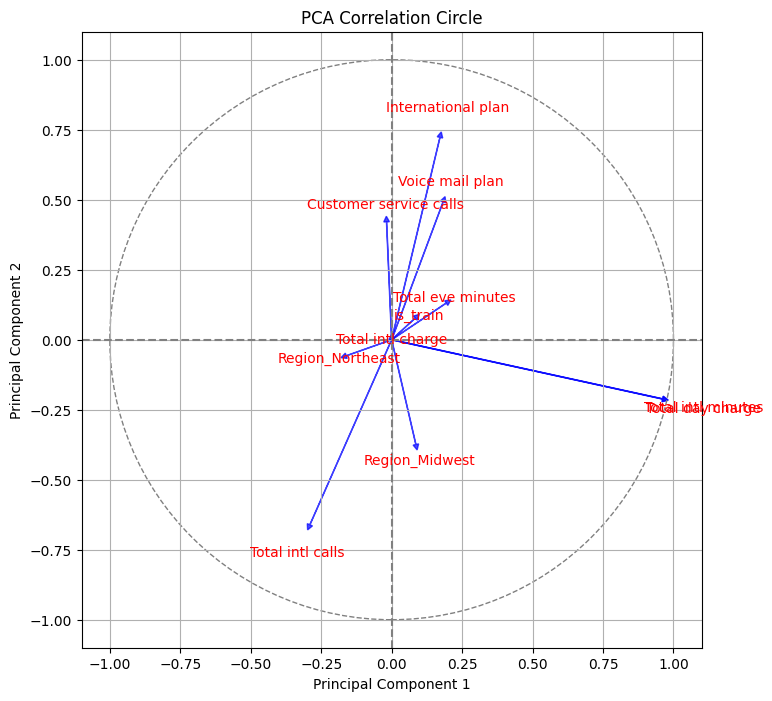

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get the feature names from the DataFrame (numeric columns)
features = df_numeric.columns

# Step 2: Calculate the contribution of features to each principal component
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Step 3: Plot the correlation circle
plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

loadings_pc1 = loadings[:, 0]  # First principal component
loadings_pc2 = loadings[:, 1]  # Second principal component

# Plot each feature as a vector in the correlation circle
for i, feature in enumerate(features):
    # Make sure the indices are within bounds
    if i < loadings.shape[0]:
        plt.arrow(0, 0, loadings_pc1[i], loadings_pc2[i], color='b', alpha=0.7, head_width=0.02, head_length=0.02)
        plt.text(loadings_pc1[i] * 1.15, loadings_pc2[i] * 1.15, feature, color='r', ha='center', va='center')

# Set circle boundaries
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Set plot limits and labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Correlation Circle')
plt.grid()
plt.show()

we have a few strongly correlated features but we are not going to explain them since the explained variance is too little : 0.36

In [ ]:
dropped_columns2 = dropped_columns1
dropped_columns2.extend([])

**4th pca try**
we are going to apply smote then pca

Principal Component 1: Explained Variance = 0.9496, Cumulative Variance = 0.9496
Principal Component 2: Explained Variance = 0.0456, Cumulative Variance = 0.9952


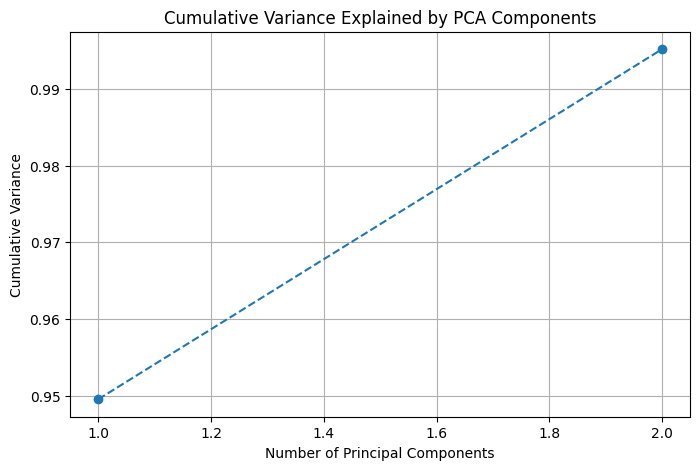

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

df_train_featured_dropped_columns1['Churn'].apply(lambda x: 1 if x == True else 0)


X = df_train_featured_dropped_columns1.drop('Churn',axis=1)
Y = df_train_featured_dropped_columns1['Churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)


# Step 5: Standardize the data (important before PCA)
scaler = StandardScaler()
continious_columns = [col for col in X_resampled.columns if col not in binary_columns]
X_resampled_scaled = scaler.fit_transform(X_resampled[continious_columns])

# Step 6: Add the 'Churn' back into the resampled data
df_resampled = X_resampled.copy()
df_resampled['Churn'] = y_resampled  # Add the Churn column back to the resampled data

# Step 7: Filter the resampled data to include only rows where Churn = 1
df_churned = df_resampled[df_resampled['Churn']==True]

# Step 8: Apply PCA on the filtered DataFrame where Churn = 1
X_churned = df_churned.drop('Churn', axis=1)  # Drop the target variable
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_churned)

# Step 9: Print the explained variance and plot cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"Principal Component {i}: Explained Variance = {var:.4f}, Cumulative Variance = {cum_var:.4f}")

# Plot Cumulative Variance Explained by PCA Components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker="o", linestyle="--")
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()


In [ ]:
X_resampled_scaled

array([[ 1.24463119, -0.12337745, -0.17858373, ..., -0.37966916,
        -0.56518349, -0.45097769],
       [-0.47011742, -0.16122503,  1.24402004, ..., -0.37966916,
        -0.56518349, -0.45097769],
       [ 0.88511856, -1.64126454,  0.66728878, ...,  2.6338721 ,
        -0.56518349, -0.45097769],
       ...,
       [ 1.25736371,  0.45409572,  2.34902319, ..., -0.37966916,
         1.76933689, -0.45097769],
       [ 1.57371885,  0.03164445, -1.06794636, ..., -0.37966916,
        -0.56518349, -0.45097769],
       [-0.71444418, -0.76779358,  0.74130484, ..., -0.37966916,
        -0.56518349, -0.45097769]])

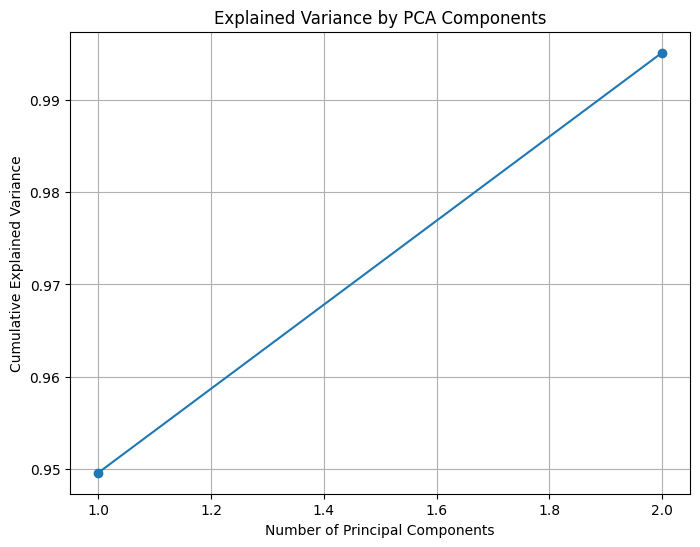

In [ ]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

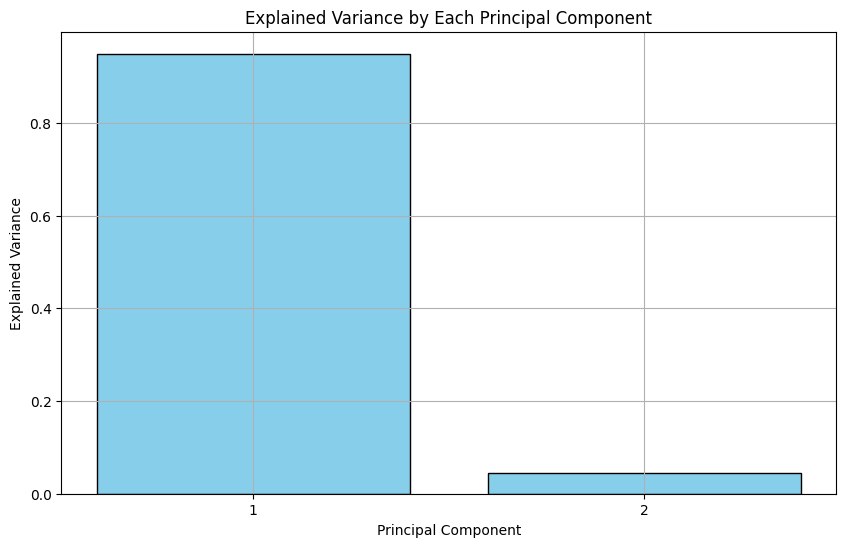

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot of the explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='skyblue', edgecolor='black')

# Labeling
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Each Principal Component')

# Optionally, set a log scale for better readability if variance values are very different
# plt.yscale('log')

plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensure each component is labeled
plt.grid(True)
plt.show()

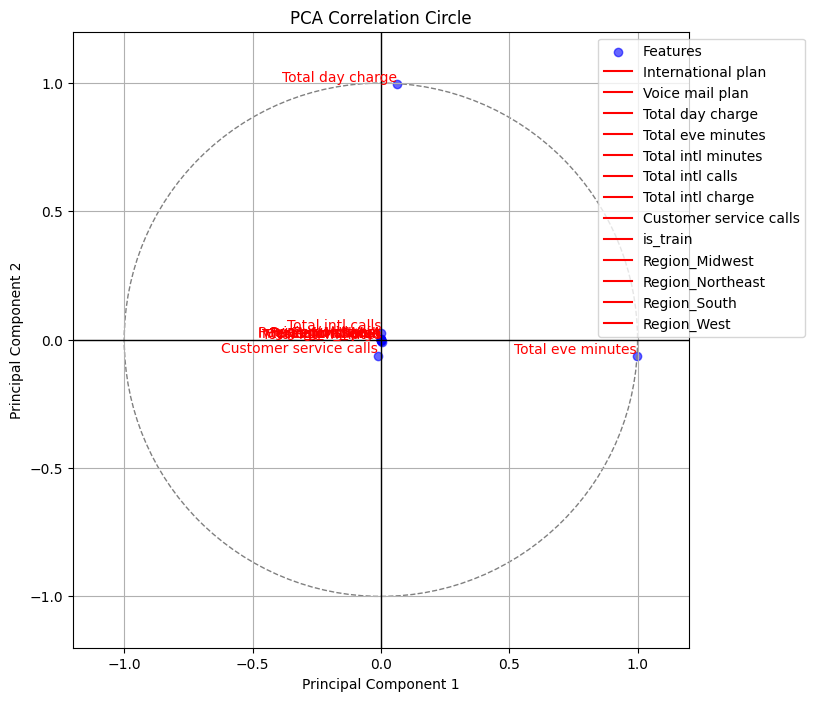

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get PCA loadings (components_)
loadings = pca.components_.T  # Transpose to match features

# Step 2: Create a correlation circle plot
plt.figure(figsize=(8, 8))  # Adjusted figsize
plt.scatter(loadings[:, 0], loadings[:, 1], color='blue', alpha=0.6, label='Features')

# Plot the feature names
for i, feature in enumerate(X_churned.columns):
    plt.text(loadings[i, 0], loadings[i, 1], feature, color='red', ha='right', va='bottom')

# Plot the circle (optional)
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Customize the plot
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)

# Set the limits of the plot to fit the circle properly
plt.xlim(-1.2, 1.2)  # Adjust limits slightly beyond the circle's radius
plt.ylim(-1.2, 1.2)


# Title and labels
plt.title('PCA Correlation Circle')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set the aspect ratio to 'equal' to ensure the circle is not distorted
plt.gca().set_aspect('equal', adjustable='box')

# Add the legend (variable names in the legend)
handles, labels = plt.gca().get_legend_handles_labels()
for i, feature in enumerate(X_churned.columns):
    plt.plot([], [], label=feature, color='red')  # Add feature names to the legend

# Show the legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.grid(True)
plt.show()


even though we reached 0.99 cumulative variance, the huge difference in explained variance by the first 2 components is very misleading and we can see that in the coreelation circle

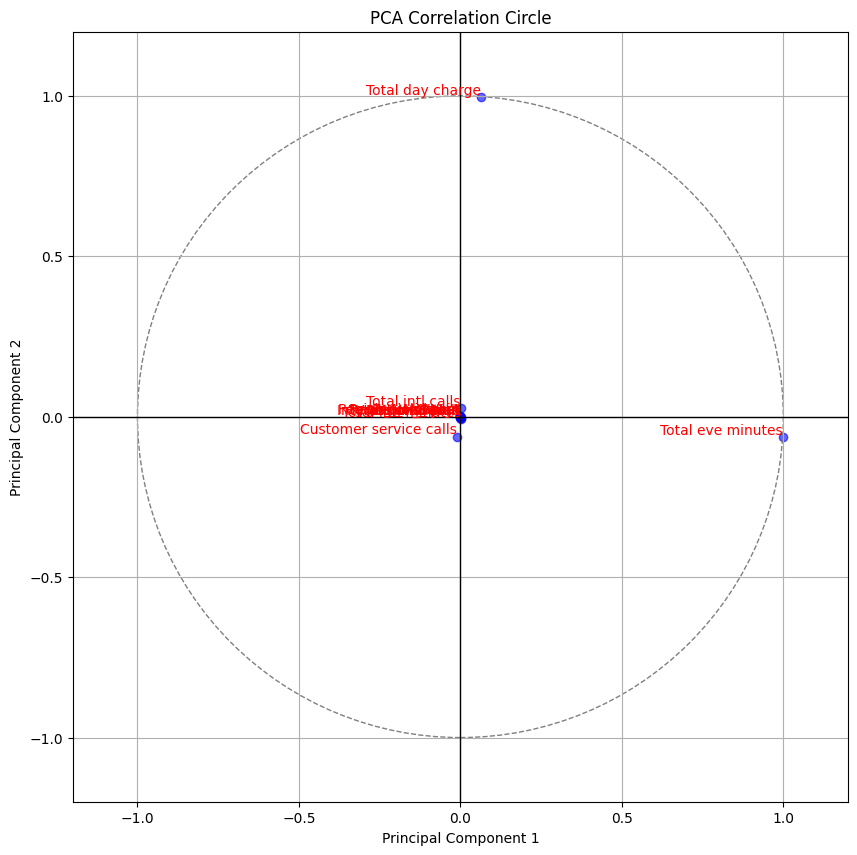

In [ ]:
# Biplot of the first two principal components
plt.figure(figsize=(10, 10))
plt.scatter(pca.components_[0], pca.components_[1], color='blue', alpha=0.6)

for i, feature in enumerate(X_churned.columns):
    plt.text(pca.components_[0][i], pca.components_[1][i], feature, color='red', ha='right', va='bottom')

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)

# Plot the circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Customize the plot
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.title('PCA Correlation Circle')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.grid(True)
plt.show()


**5th pca try**
* we made an algorithm that tries all the different combination of colmuns possible and we printed the resulats in csv file.
* this file contains the columns combination and the explained variance by this column, (this part of the code creates the csv file, but we will provide the file for conveniance)
* the combinations are composed of a fixed colmuns that have a high correlation with the target variable and changing colmuns that differenciate the combinations.

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from itertools import combinations

# # Assume df_train_featured_dropped_columns1 is your dataset
# df = df_train_featured
# target_column = 'Churn'

# # Step 1: Compute the Correlation Matrix
# correlation_matrix = df.corr()

# # Step 2: Identify the fixed columns (those with correlation >= 0.15 with the target)
# threshold = 0.15
# fixed_columns = correlation_matrix[target_column][abs(correlation_matrix[target_column]) >= threshold].index.tolist()

# # Remove the target variable itself from the list of fixed columns
# fixed_columns.remove(target_column)

# # Step 3: Identify the variable columns (those with correlation < 0.15 with the target)
# variable_columns = correlation_matrix[target_column][abs(correlation_matrix[target_column]) < threshold].index.tolist()

# # Step 4: Generate all possible combinations of the variable columns
# all_combinations = []
# for r in range(1, len(variable_columns) + 1):
#     all_combinations.extend(combinations(variable_columns, r))

# # Step 5: Apply PCA to each combination of fixed columns and variable columns
# results = []

# for combination in all_combinations:
#     # Combine fixed columns with the current combination of variable columns
#     selected_columns = fixed_columns + list(combination)

#     # Select the subset of the dataframe
#     subset = df[selected_columns]

#     # Step 5.1: Apply PCA
#     pca = PCA(n_components=2)
#     pca.fit(subset)

#     # Step 5.2: Calculate the cumulative variance of the first two components
#     cumulative_variance = np.sum(pca.explained_variance_ratio_[:2])

#     # Step 5.3: Store the result
#     results.append({
#         'Columns': selected_columns,
#         'Cumulative Variance (First 2 Components)': cumulative_variance
#     })

# # Step 6: Convert the results to a DataFrame and save to CSV
# results_df = pd.DataFrame(results)
# results_df.to_csv('pca_results.csv', index=False)

# # Optionally, you can also sort the results by the cumulative variance to find the best combination
# best_combination = results_df.sort_values(by='Cumulative Variance (First 2 Components)', ascending=False).iloc[0]
# print(best_combination)


In [ ]:
#print(results)

In [ ]:
df_pca_columns = pd.read_csv("pca_results_filtered_sorted.csv")


In [ ]:
df_pca_columns.describe()

,Cumulative Variance (First 2 Components)
count,9214.000000
mean,0.832154
std,0.126156
min,0.515343
25%,0.739022
50%,0.855206
75%,0.923756
max,0.999904


In [ ]:
df_pca_columns.head()

,Columns,Cumulative Variance (First 2 Components)
0,"['International plan', 'Total day minutes', 'T...",0.999904
1,"['International plan', 'Total day minutes', 'T...",0.999783
2,"['International plan', 'Total day minutes', 'T...",0.999763
3,"['International plan', 'Total day minutes', 'T...",0.999729
4,"['International plan', 'Total day minutes', 'T...",0.999717


In [ ]:
df_pca_columns_combinations = df_pca_columns["Columns"]

In [ ]:
df_train_featured.columns

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn', 'is_train',
       'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_West',
       'Area code_408', 'Area code_415', 'Area code_510'],
      dtype='object')

we cleaned the csv file by removing misleading or not optimal combinations and sorted it by the explained cumulative variance of the first 2 components and added a colmun that has the difference of explained variance between them to avoid the previous issue. (we will provide the csv file of this part of the code aswell)

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# import ast

# # Create lists to store the results
# combinations = []
# cumulative_explained_variances = []
# variance_differences = []

# # Iterate through each combination
# for combination in df_pca_columns_combinations:
#     # Convert the string to an actual Python list
#     if isinstance(combination, str):
#         combination = ast.literal_eval(combination)  # Converts "['col1', 'col2']" to ['col1', 'col2']

#     # Select the columns for the current combination
#     df_pca_aux = df_train_featured[combination]

#     # Scale the data
#     scaler = StandardScaler()
#     continious_columns = [col for col in df_pca_aux.columns if col not in binary_columns]
#     df_pca_aux_scaled = scaler.fit_transform(df_pca_aux[continious_columns])

#     # Apply PCA
#     pca = PCA()
#     pca.fit(df_pca_aux_scaled)

#     # Calculate explained variance for the first two components
#     explained_variance = pca.explained_variance_ratio_
#     if len(explained_variance) > 1:
#         variance_difference = explained_variance[0] - explained_variance[1]
#         cumulative_explained_variance = explained_variance[0] + explained_variance[1]
#     else:
#         variance_difference = None
#         cumulative_explained_variance = None

#     # Store the results
#     combinations.append(combination)
#     variance_differences.append(variance_difference)
#     cumulative_explained_variances.append(cumulative_explained_variance)

# # Create a DataFrame to store the results
# results = pd.DataFrame({
#     "Combination": combinations,
#     "Variance_Difference": variance_differences,
#     "Cumulative_Explained_Variance": cumulative_explained_variances
# })

# # Sort the DataFrame by Cumulative Explained Variance in descending order
# results = results.sort_values(by="Cumulative_Explained_Variance", ascending=False)

# # Save the sorted results to a CSV file
# results.to_csv("sorted_pca_results.csv", index=False)

# print("Results saved to 'sorted_pca_results.csv'.")


we applied pca on the best combinations possible and chose this combination of columns since is has the best explained features by the correlation circle

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the columns for PCA
columns_for_pca = ['International plan', 'Total day minutes', 'Total day charge', 'Customer service calls', 'Total eve minutes']

# Select the columns from the dataset
df_pca_aux = df_train_featured[columns_for_pca]

# Scale the data
scaler = StandardScaler()
continious_columns = [col for col in df_pca_aux.columns if col not in binary_columns]
df_pca_aux_scaled = scaler.fit_transform(df_pca_aux[continious_columns])

# Apply PCA
pca = PCA()
df_pca_aux_pca = pca.fit_transform(df_pca_aux_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Display results
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

# Save the PCA-transformed data to a DataFrame (optional)
pca_columns = [f"PC{i+1}" for i in range(df_pca_aux_pca.shape[1])]
df_pca_result = pd.DataFrame(df_pca_aux_pca, columns=pca_columns)

# Save to CSV (optional)
df_pca_result.to_csv("pca_transformed_data.csv", index=False)

print("PCA transformation complete and saved to 'pca_transformed_data.csv'.")


Explained Variance Ratio: [5.00310207e-01 2.53095131e-01 2.46594650e-01 1.20363208e-08]
Cumulative Explained Variance: [0.50031021 0.75340534 0.99999999 1.        ]
PCA transformation complete and saved to 'pca_transformed_data.csv'.


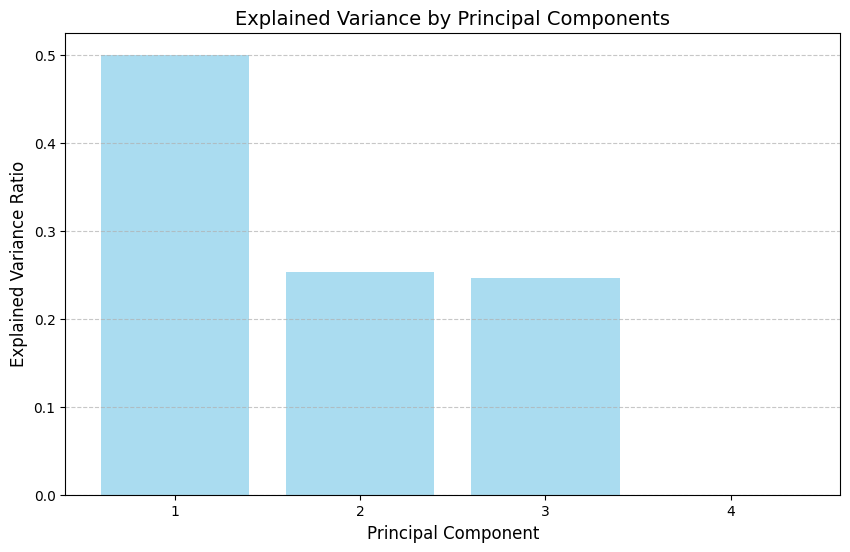

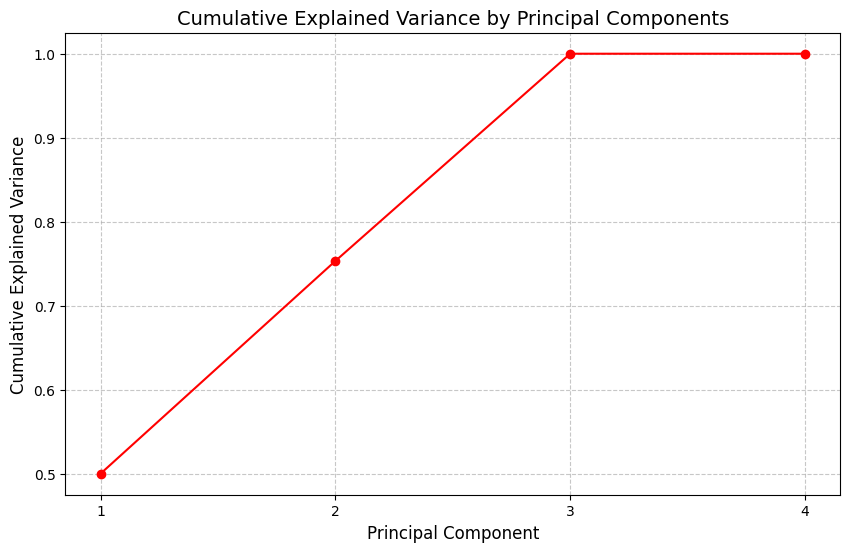

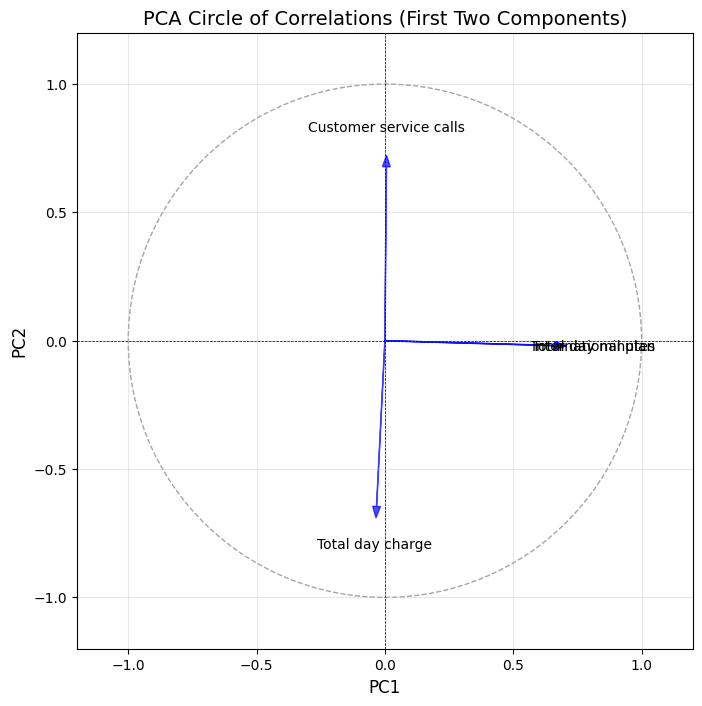

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot 1: Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='skyblue')
plt.title('Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='red', linestyle='-')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# PCA Circle Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the unit circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', alpha=0.7)
ax.add_artist(circle)

# Plot feature loadings
components = pca.components_[:2]  # Loadings for PC1 and PC2
for i, (x, y) in enumerate(zip(components[0], components[1])):
    plt.arrow(0, 0, x, y, color='blue', alpha=0.7, head_width=0.03, length_includes_head=True)
    plt.text(x * 1.15, y * 1.15, columns_for_pca[i], fontsize=10, ha='center', va='center', color='black')

# Formatting
plt.title('PCA Circle of Correlations (First Two Components)', fontsize=14)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.grid(alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


customer service is stongly with pc2 +
total dat charge is strong correlated with pc2 -
total day charge and total day minutes are stongly correlated with pc 1 +

we can interpret that we will have 3 clusters while using our non-supervised methods

# **CAH**

# **elbow**

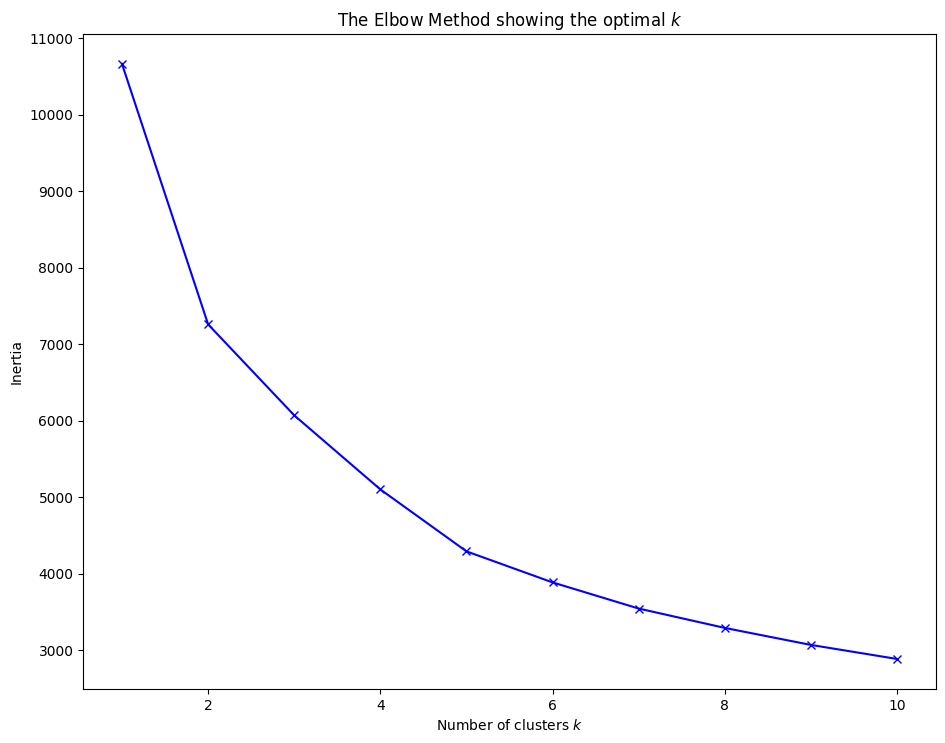

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continious_columns = [col for col in df_pca_aux.columns if col not in binary_columns]
df_churned_scaled = scaler.fit_transform(df_pca_aux[continious_columns])

model = KMeans(n_clusters=3, init='random', n_init=3, random_state=109).fit(df_churned_scaled)


wss = []
for i in range(1,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(df_churned_scaled)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

we will have 2+1 = 3 clusters (confirming our previous assumption)

(in the results scroll a bit up to see the cah graphe)

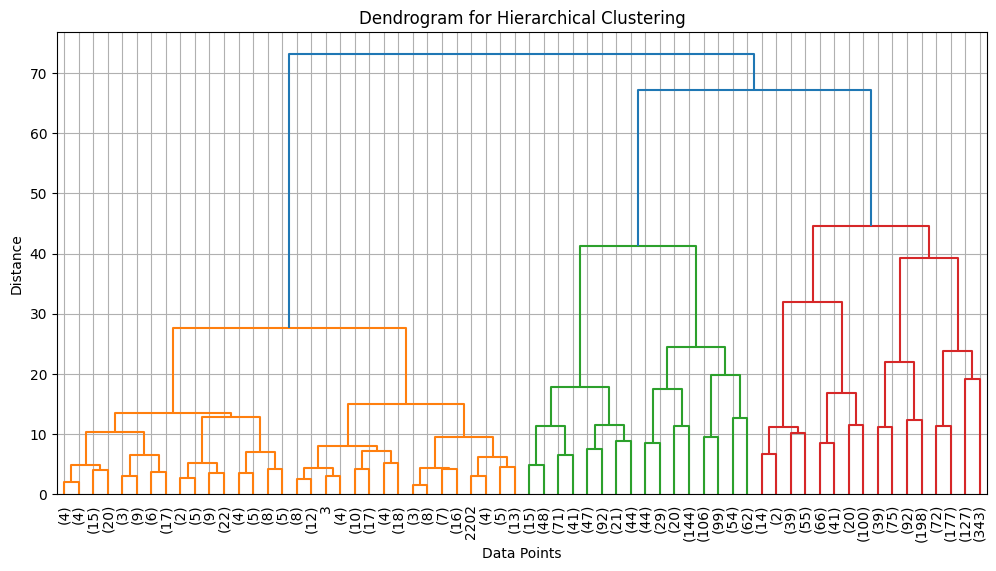

Length of cluster_labels: 2666
Length of df_churned: 2666
   International plan  Total day minutes  Total day charge  \
0                   0              265.1             45.07   
1                   0              161.6             27.47   
2                   0              243.4             41.38   
3                   1              299.4             50.90   
4                   1              166.7             28.34   

   Customer service calls  Total eve minutes  Cluster  
0                       1              197.4        3  
1                       1              195.5        3  
2                       0              121.2        3  
3                       2               61.9        1  
4                       3              148.3        1  

Cluster 1 Summary:
       International plan  Total day minutes  Total day charge  \
count               269.0         269.000000        269.000000   
mean                  1.0         187.295911         31.840967   
std            

<ipython-input-51-abe4a3244342>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca_aux['Cluster'] = cluster_labels


       International plan  Total day minutes  Total day charge  \
count         1460.000000        1460.000000       1460.000000   
mean             0.000685         206.784795         35.153911   
std              0.026171          41.403670          7.038582   
min              0.000000          81.700000         13.890000   
25%              0.000000         177.575000         30.187500   
50%              0.000000         205.450000         34.930000   
75%              0.000000         232.625000         39.545000   
max              1.000000         350.800000         59.640000   

       Customer service calls  Total eve minutes  Cluster  
count             1460.000000        1460.000000   1460.0  
mean                 1.756849         210.992945      3.0  
std                  1.476497          43.332707      0.0  
min                  0.000000          52.900000      3.0  
25%                  1.000000         182.650000      3.0  
50%                  1.000000         211.700

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the data (dropping 'Churn' column for clustering)
scaler = StandardScaler()
df_churned_scaled = scaler.fit_transform(df_pca_aux)  # Ensure df_pca_aux matches df_churned dimensions

# Step 2: Perform Hierarchical Clustering (CAH)
linkage_matrix = linkage(df_churned_scaled, method='ward')

# Step 3: Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid()
plt.show()

# Step 4: Cut the dendrogram to form clusters
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Step 5: Check length of cluster labels
print(f"Length of cluster_labels: {len(cluster_labels)}")
print(f"Length of df_churned: {len(df_pca_aux)}")

# Align lengths if necessary
if len(cluster_labels) != len(df_pca_aux):
    print("Mismatch in row counts. Adjusting...")
    df_pca_aux = df_pca_aux.iloc[:len(cluster_labels)]  # Truncate df_churned to match cluster labels

# Step 6: Add cluster labels to the DataFrame
df_pca_aux['Cluster'] = cluster_labels

# Display the resulting DataFrame with clusters
print(df_pca_aux.head())

# Step 7 (Optional): Analyze cluster composition
for cluster in range(1, num_clusters + 1):
    print(f"\nCluster {cluster} Summary:")
    print(df_pca_aux[df_pca_aux['Cluster'] == cluster].describe())


print("**************")
cluster_summary = df_pca_aux.groupby('Cluster').mean()
print(cluster_summary)


Cluster 1:
* Customers in this group benefit from an international plan.
They have moderate usage levels for Total day minutes, Total day calls, and Total evening minutes, suggesting a balanced usage pattern.

Cluster 2:
* This group consists of customers who make the fewest calls to customer service.
They have the lowest levels of Total day minutes, Total day calls, and Total evening minutes, indicating minimal engagement with the service and potentially low usage overall.

Cluster 3:
* Customers in this cluster make the most calls to customer service, indicating higher support needs or dissatisfaction.
They have the highest levels of Total day minutes, Total day calls, and Total evening minutes, suggesting they are the most active and engaged users.


In [ ]:
df_train_testing = df_train_featured[['International plan', 'Total day minutes', 'Total day charge', 'Customer service calls', 'Total eve minutes','Churn']]
df_train_testing = df_train_testing[df_train_testing['Churn']==1]

# **CAH ON CHURNING CUSTOMERS**

we applied cah on churning customers only to understand the reason they churn(scroll up in the results to see the cah graphe)

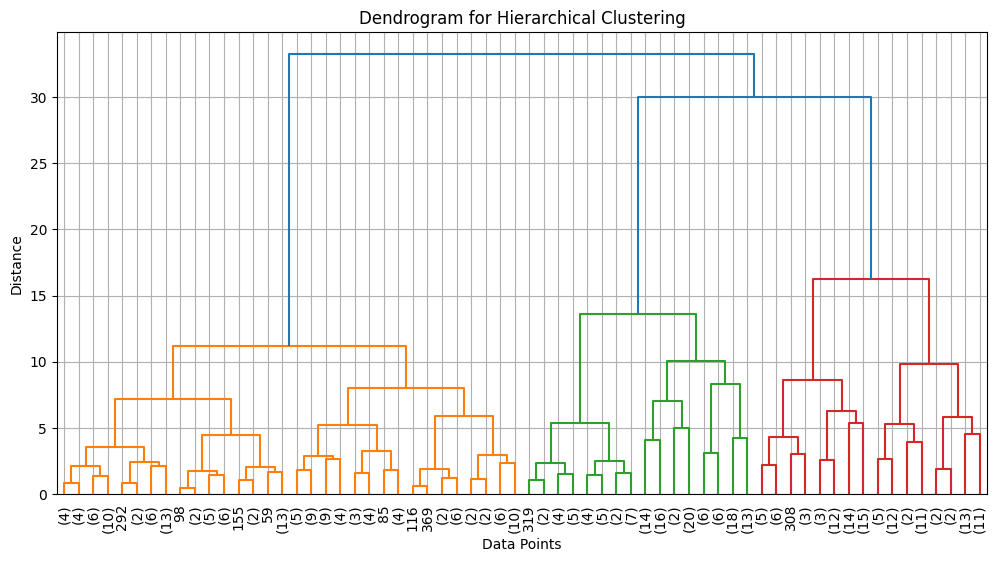

Length of cluster_labels: 388
Length of df_churned: 388
    International plan  Total day minutes  Total day charge  \
18                   0               62.4             10.61   
28                   0              249.6             42.43   
35                   1              173.1             29.43   
45                   0              151.0             25.67   
48                   0              198.4             33.73   

    Customer service calls  Total eve minutes  Churn  Cluster  
18                       5              169.9   True        2  
28                       1              252.4   True        1  
35                       0              203.9   True        3  
45                       5              219.7   True        2  
48                       3               75.3   True        2  

Cluster 1 Summary:
       International plan  Total day minutes  Total day charge  \
count               146.0         146.000000        146.000000   
mean                  0.0    

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the data (dropping 'Churn' column for clustering)
scaler = StandardScaler()
df_churned_scaled = scaler.fit_transform(df_train_testing)  # Ensure df_pca_aux matches df_churned dimensions

# Step 2: Perform Hierarchical Clustering (CAH)
linkage_matrix = linkage(df_churned_scaled, method='ward')

# Step 3: Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid()
plt.show()

# Step 4: Cut the dendrogram to form clusters
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Step 5: Check length of cluster labels
print(f"Length of cluster_labels: {len(cluster_labels)}")
print(f"Length of df_churned: {len(df_train_testing)}")

# Align lengths if necessary
if len(cluster_labels) != len(df_train_testing):
    print("Mismatch in row counts. Adjusting...")
    df_train_testing = df_train_testing.iloc[:len(cluster_labels)]  # Truncate df_churned to match cluster labels

# Step 6: Add cluster labels to the DataFrame
df_train_testing['Cluster'] = cluster_labels

# Display the resulting DataFrame with clusters
print(df_train_testing.head())

# Step 7 (Optional): Analyze cluster composition
for cluster in range(1, num_clusters + 1):
    print(f"\nCluster {cluster} Summary:")
    print(df_train_testing[df_train_testing['Cluster'] == cluster].describe())


print("**************")
cluster_summary = df_train_testing.groupby('Cluster').mean()
print(cluster_summary)


* Cluster 1:
The customers in this cluster have the highest values for Total day minutes, Total day charge, and Total evening minutes averages . This indicates that these customers spend a lot of time on the phone, leading to higher total charges.

* Cluster 2:
This cluster is characterized by customers who make the most calls to customer service, suggesting they require frequent assistance or have higher support needs.

* Cluster 3:
This cluster is a distinct group consisting entirely of international customers, highlighting their unique usage patterns and characteristics.

# **K-means**

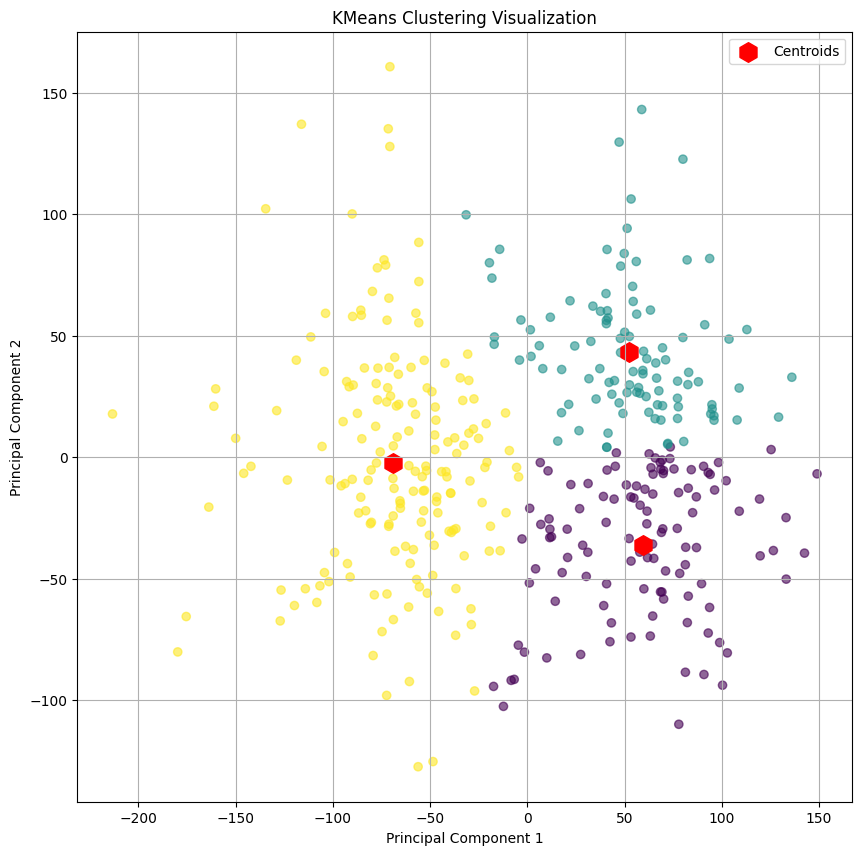

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'X_churned' is your dataset
# Step 1: Scale the data for better clustering
scaler = StandardScaler()
continious_columns = [col for col in df_train_testing.columns if col not in binary_columns]
X_scaled = scaler.fit_transform(df_train_testing[continious_columns])

# Step 2: Reduce data dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
Z = pca.fit_transform(df_train_testing)  # 2D representation of the data

# Step 3: Apply KMeans clustering
n_clusters = 3  # Set the desired number of clusters
model = KMeans(n_clusters=n_clusters, init='random', n_init=3, random_state=109)
model.fit(Z)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 10))
plt.scatter(Z[:, 0], Z[:, 1], c=model.labels_, cmap='viridis', alpha=0.6)  # Plot data points colored by cluster
plt.scatter(
    model.cluster_centers_[:, 0],
    model.cluster_centers_[:, 1],
    c='red',
    marker='h',
    s=200,
    label='Centroids'
)  # Plot cluster centroids
plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

we can easily differenciate between the 3 clusters, so our approach was succefull

now we will apply pca on the totality on the data but with another approach

In [ ]:
print(columns_for_pca)

df_train_featured = df_combined[df_combined['is_train']==1]
df_test_featured = df_combined[df_combined['is_train']==0]

X = df_train_featured.drop('Churn',axis=1)
X_featured = X[columns_for_pca]
Y = df_train_featured['Churn']


['International plan', 'Total day minutes', 'Total day charge', 'Customer service calls', 'Total eve minutes']


# **PCA with featured totals**

In [ ]:
df_train_featured = df_combined[df_combined['is_train']==1]

In [ ]:
df_combined_sum_featured = df_train_featured.copy()
df_combined_sum_featured['Total minutes'] = (df_combined_sum_featured['Total day minutes'] + df_combined_sum_featured['Total eve minutes'] + df_combined_sum_featured['Total night minutes'] + df_combined_sum_featured['Total day minutes'])
df_combined_sum_featured['Total charge'] = (df_combined_sum_featured['Total day charge'] + df_combined_sum_featured['Total eve charge'] + df_combined_sum_featured['Total night charge'] + df_combined_sum_featured['Total day charge'])
df_combined_sum_featured['Total calls'] = (df_combined_sum_featured['Total day calls'] + df_combined_sum_featured['Total eve calls'] + df_combined_sum_featured['Total night calls'] + df_combined_sum_featured['Total day calls'])
pca_reduced_columns = ['Total minutes','Total charge','Total calls','International plan','Customer service calls']

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the columns for PCA
columns_for_pca = pca_reduced_columns.copy()

# Select the columns from the dataset
df_pca_aux = df_combined_sum_featured[columns_for_pca]

# Scale the data
scaler = StandardScaler()
continious_columns = [col for col in df_pca_aux.columns if col not in binary_columns]
df_pca_aux_scaled = scaler.fit_transform(df_pca_aux[continious_columns])

# Apply PCA
pca = PCA()
df_pca_aux_pca = pca.fit_transform(df_pca_aux_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Display results
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

# Save the PCA-transformed data to a DataFrame (optional)
pca_columns = [f"PC{i+1}" for i in range(df_pca_aux_pca.shape[1])]
df_pca_result = pd.DataFrame(df_pca_aux_pca, columns=pca_columns)

# Save to CSV (optional)
#df_pca_result.to_csv("pca_transformed_data.csv", index=False)

print("PCA transformation complete and saved to 'pca_transformed_data.csv'.")


Explained Variance Ratio: [0.4861309  0.25242786 0.24707561 0.01436563]
Cumulative Explained Variance: [0.4861309  0.73855876 0.98563437 1.        ]
PCA transformation complete and saved to 'pca_transformed_data.csv'.


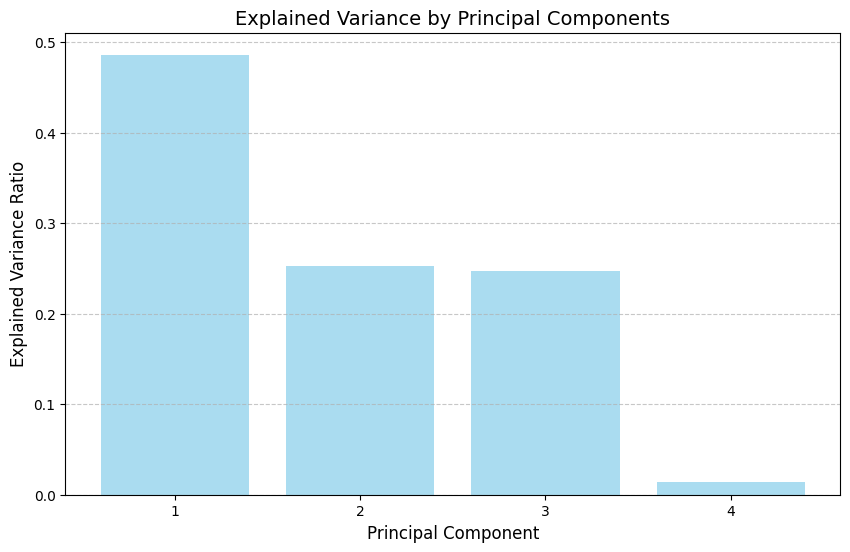

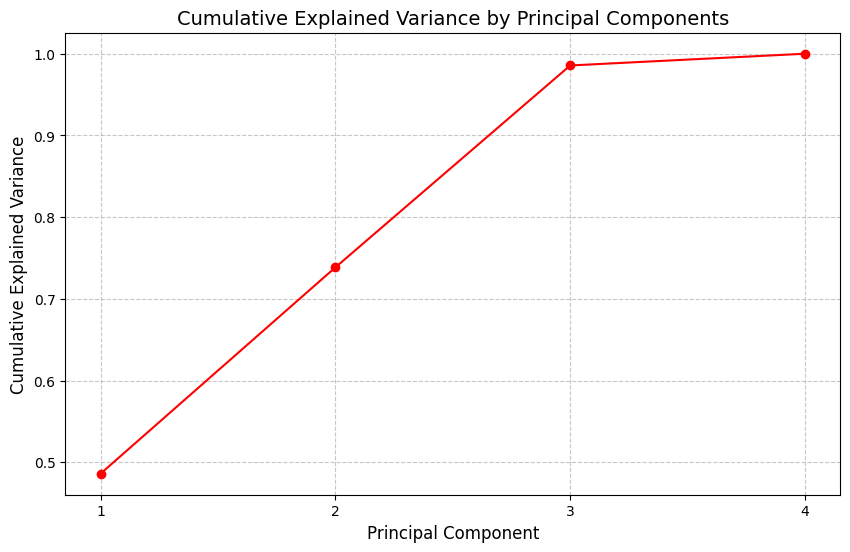

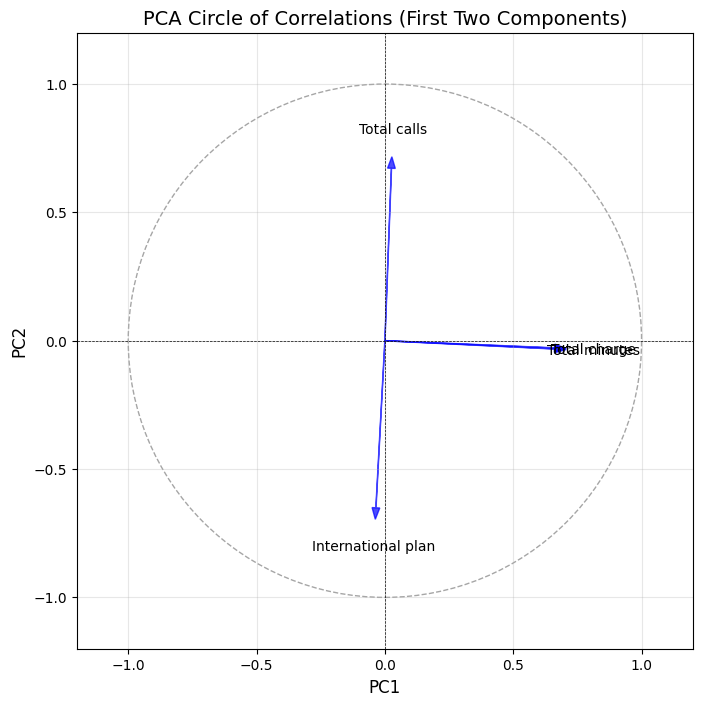

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot 1: Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='skyblue')
plt.title('Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='red', linestyle='-')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# PCA Circle Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the unit circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', alpha=0.7)
ax.add_artist(circle)

# Plot feature loadings
components = pca.components_[:2]  # Loadings for PC1 and PC2
for i, (x, y) in enumerate(zip(components[0], components[1])):
    plt.arrow(0, 0, x, y, color='blue', alpha=0.7, head_width=0.03, length_includes_head=True)
    plt.text(x * 1.15, y * 1.15, pca_reduced_columns[i], fontsize=10, ha='center', va='center', color='black')

# Formatting
plt.title('PCA Circle of Correlations (First Two Components)', fontsize=14)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.grid(alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# **CAH**

Elbow

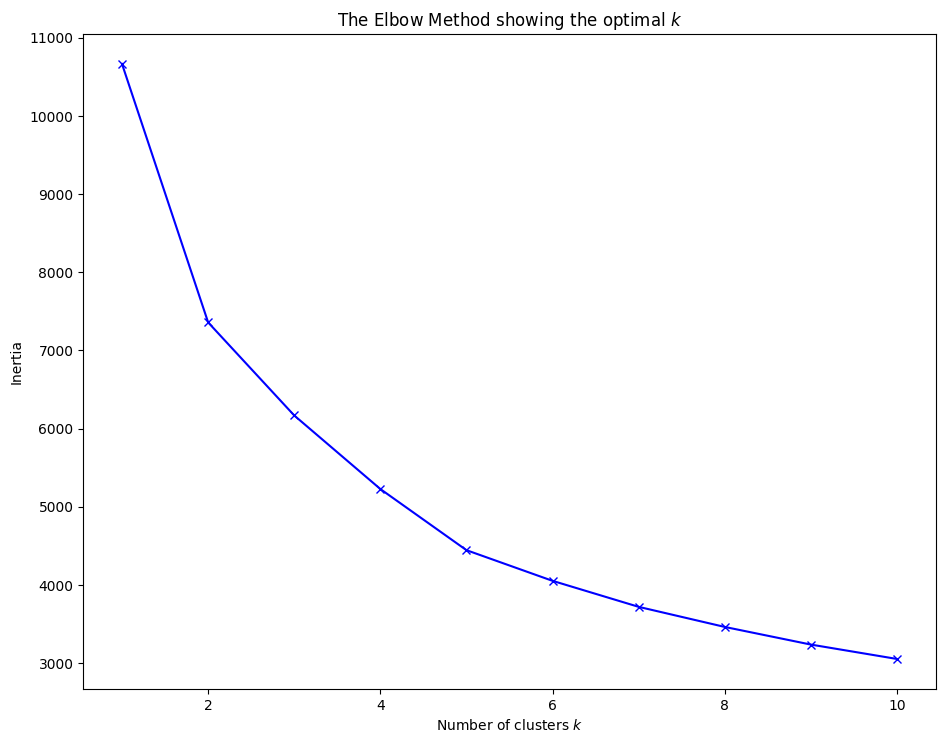

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continious_columns = [col for col in df_pca_aux.columns if col not in binary_columns]
df_churned_scaled = scaler.fit_transform(df_pca_aux[continious_columns])

model = KMeans(n_clusters=3, init='random', n_init=3, random_state=109).fit(df_churned_scaled)


wss = []
for i in range(1,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(df_churned_scaled)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

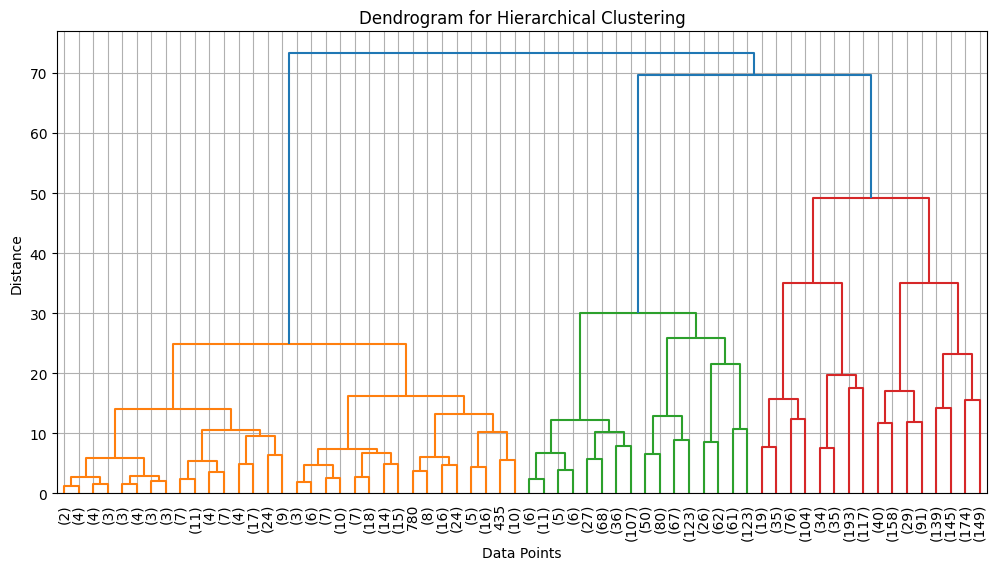

Length of cluster_labels: 2666
Length of df_churned: 2666
   Total minutes  Total charge  Total calls  International plan  \
0          972.3        117.93          410                   0   
1          773.1         83.01          452                   0   
2          770.6        100.38          442                   0   
3          857.6        115.92          319                   1   
4          668.6         77.70          469                   1   

   Customer service calls  Cluster  
0                       1        2  
1                       1        3  
2                       0        2  
3                       2        1  
4                       3        1  

Cluster 1 Summary:
       Total minutes  Total charge  Total calls  International plan  \
count     270.000000    270.000000   270.000000               270.0   
mean      778.998519     90.104148   401.903704                 1.0   
std       134.735921     20.060709    50.023470                 0.0   
min       427

<ipython-input-61-d4a62fce4aaf>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca_aux['Cluster'] = cluster_labels


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the data (dropping 'Churn' column for clustering)
scaler = StandardScaler()
#continious_columns = [col for col in df_pca_aux.columns if col not in binary_columns]
df_churned_scaled = scaler.fit_transform(df_pca_aux)  # Ensure df_pca_aux matches df_churned dimensions

# Step 2: Perform Hierarchical Clustering (CAH)
linkage_matrix = linkage(df_churned_scaled, method='ward')

# Step 3: Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid()
plt.show()

# Step 4: Cut the dendrogram to form clusters
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Step 5: Check length of cluster labels
print(f"Length of cluster_labels: {len(cluster_labels)}")
print(f"Length of df_churned: {len(df_pca_aux)}")

# Align lengths if necessary
if len(cluster_labels) != len(df_pca_aux):
    print("Mismatch in row counts. Adjusting...")
    df_pca_aux = df_pca_aux.iloc[:len(cluster_labels)]  # Truncate df_churned to match cluster labels

# Step 6: Add cluster labels to the DataFrame
df_pca_aux['Cluster'] = cluster_labels

# Display the resulting DataFrame with clusters
print(df_pca_aux.head())

# Step 7 (Optional): Analyze cluster composition
for cluster in range(1, num_clusters + 1):
    print(f"\nCluster {cluster} Summary:")
    print(df_pca_aux[df_pca_aux['Cluster'] == cluster].describe())


print("**************")
cluster_summary = df_pca_aux.groupby('Cluster').mean()
print(cluster_summary)


* Cluster 1:
The customers in this cluster all benefit from an international plan and exhibit moderate levels of Total minutes, Total charges, and Total calls. This suggests a balanced usage pattern.

* Cluster 2:
This cluster contains customers with the highest levels of Total minutes, Total charges, and Total calls across all clusters. Additionally, they have the lowest average number of customer service calls, which could indicate high satisfaction with the service.

* Cluster 3:
The customers in this cluster have the highest number of customer service calls but the lowest averages for Total minutes, Total charges, and Total calls, suggesting potential dissatisfaction or lower overall usage.


This time, we opted for a different approach where we logically grouped variables. For example, we created a new variable called Total Minutes Charge by combining Total Evening Minutes, Total Night Minutes, and Total Day Minutes. Similarly, we created Total Charge by combining Total Evening Charge, Total Night Charge, and Total Day Charge. Finally, we introduced Total Calls by combining Total Evening Calls, Total Night Calls, and Total Day Calls.

In [ ]:
df_combined_sum_featured = df_train_featured.copy()
df_combined_sum_featured = df_combined_sum_featured[df_combined_sum_featured['Churn']==1]
df_combined_sum_featured['Total minutes'] = (df_combined_sum_featured['Total day minutes'] + df_combined_sum_featured['Total eve minutes'] + df_combined_sum_featured['Total night minutes'] + df_combined_sum_featured['Total day minutes'])
df_combined_sum_featured['Total charge'] = (df_combined_sum_featured['Total day charge'] + df_combined_sum_featured['Total eve charge'] + df_combined_sum_featured['Total night charge'] + df_combined_sum_featured['Total day charge'])
df_combined_sum_featured['Total calls'] = (df_combined_sum_featured['Total day calls'] + df_combined_sum_featured['Total eve calls'] + df_combined_sum_featured['Total night calls'] + df_combined_sum_featured['Total day calls'])
pca_reduced_columns = ['Total minutes','Total charge','Total calls','International plan','Customer service calls']
df_combined_sum_featured = df_combined_sum_featured[pca_reduced_columns]

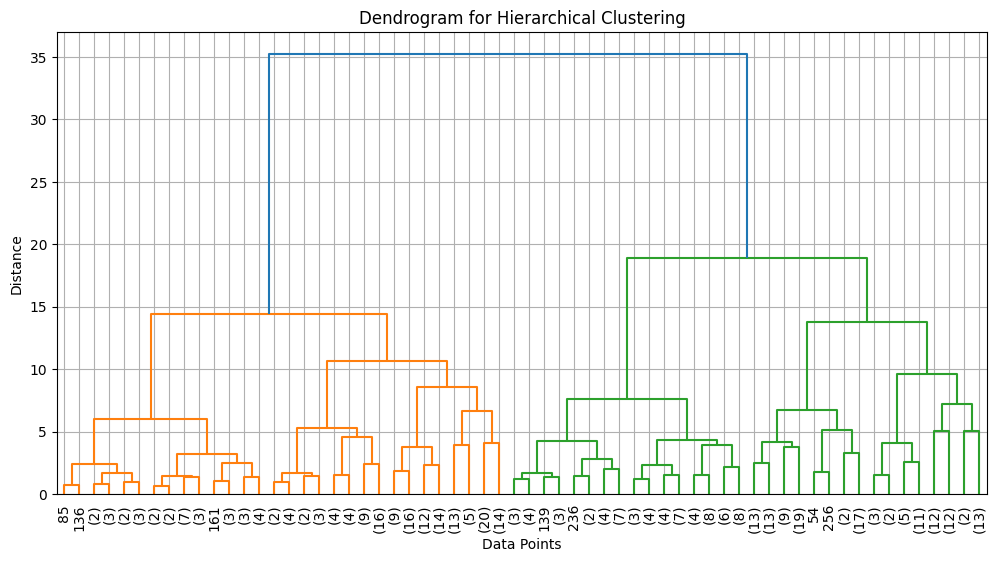

Length of cluster_labels: 388
Length of df_churned: 388
    International plan  Total day minutes  Total day charge  \
18                   0               62.4             10.61   
28                   0              249.6             42.43   
35                   1              173.1             29.43   
45                   0              151.0             25.67   
48                   0              198.4             33.73   

    Customer service calls  Total eve minutes  Churn  Cluster  
18                       5              169.9   True        3  
28                       1              252.4   True        1  
35                       0              203.9   True        3  
45                       5              219.7   True        3  
48                       3               75.3   True        3  

Cluster 1 Summary:
       International plan  Total day minutes  Total day charge  \
count          184.000000         184.000000        184.000000   
mean             0.233696    

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Step 1: Standardize the data (dropping 'Churn' column for clustering)
scaler = StandardScaler()
continious_columns = [col for col in df_combined_sum_featured.columns if col not in binary_columns]
df_churned_scaled = scaler.fit_transform(df_combined_sum_featured[continious_columns])  # Ensure df_pca_aux matches df_churned dimensions

# Step 2: Perform Hierarchical Clustering (CAH)
linkage_matrix = linkage(df_churned_scaled, method='ward')

# Step 3: Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid()
plt.show()

# Step 4: Cut the dendrogram to form clusters
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Step 5: Check length of cluster labels
print(f"Length of cluster_labels: {len(cluster_labels)}")
print(f"Length of df_churned: {len(df_train_testing)}")

# Align lengths if necessary
if len(cluster_labels) != len(df_train_testing):
    print("Mismatch in row counts. Adjusting...")
    df_train_testing = df_train_testing.iloc[:len(cluster_labels)]  # Truncate df_churned to match cluster labels

# Step 6: Add cluster labels to the DataFrame
df_train_testing['Cluster'] = cluster_labels

# Display the resulting DataFrame with clusters
print(df_train_testing.head())

# Step 7 (Optional): Analyze cluster composition
for cluster in range(1, num_clusters + 1):
    print(f"\nCluster {cluster} Summary:")
    print(df_train_testing[df_train_testing['Cluster'] == cluster].describe())


print("**************")
cluster_summary = df_train_testing.groupby('Cluster').mean()
print(cluster_summary)


* Cluster 1:
Customers in this cluster do not have an international plan and show moderate levels of Total day minutes , Total day charge , and Total evening minutes. However, they have the highest average customer service calls , which may indicate frequent issues or dissatisfaction.

* Cluster 2:
This cluster represents customers who all benefit from an international plan and exhibit moderately high levels of Total day minutes , Total day charge, and Total evening minutes . They also have a low average number of customer service calls, which could suggest greater satisfaction or fewer issues with the service.

* Cluster 3:
Customers in this cluster show the highest levels of Total day minutes , Total day charge, and Total evening minutes compared to other clusters. They also have the lowest average customer service calls, indicating high satisfaction or minimal service complaints.



# **K-means**

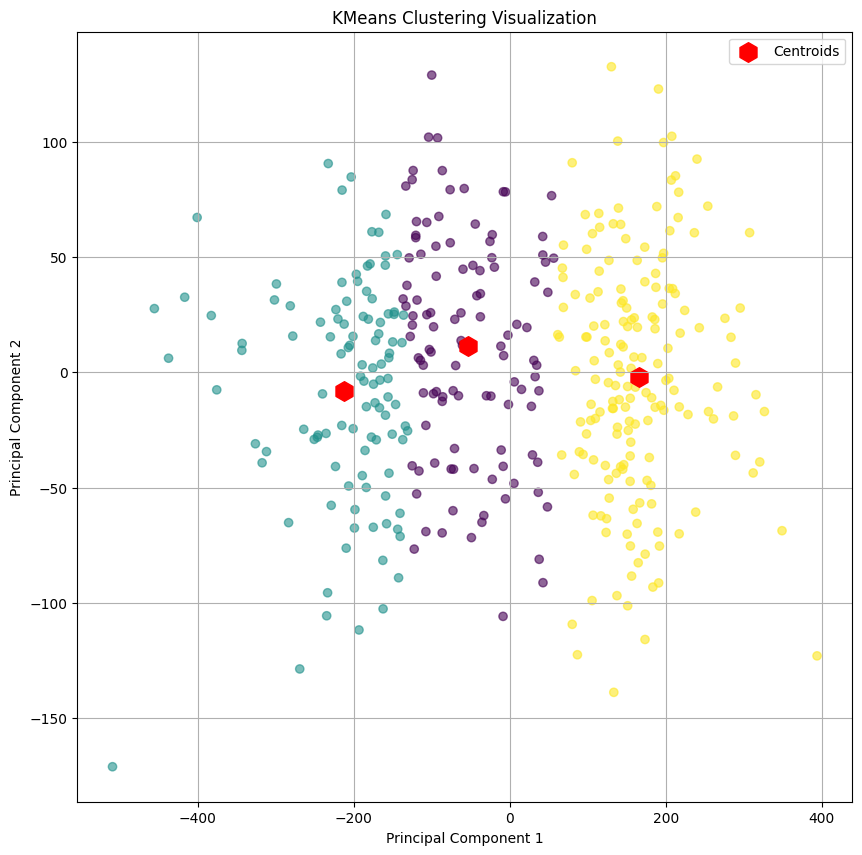

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'X_churned' is your dataset
# Step 1: Scale the data for better clustering
scaler = StandardScaler()
continious_columns = [col for col in df_combined_sum_featured.columns if col not in binary_columns]
X_scaled = scaler.fit_transform(df_combined_sum_featured[continious_columns])

# Step 2: Reduce data dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
Z = pca.fit_transform(df_combined_sum_featured)  # 2D representation of the data

# Step 3: Apply KMeans clustering
n_clusters = 3  # Set the desired number of clusters
model = KMeans(n_clusters=n_clusters, init='random', n_init=3, random_state=109)
model.fit(Z)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 10))
plt.scatter(Z[:, 0], Z[:, 1], c=model.labels_, cmap='viridis', alpha=0.6)  # Plot data points colored by cluster
plt.scatter(
    model.cluster_centers_[:, 0],
    model.cluster_centers_[:, 1],
    c='red',
    marker='h',
    s=200,
    label='Centroids'
)  # Plot cluster centroids
plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

this approach is also succesfull

moving to the supervised part we will create 3 iteration per model
* one on raw data, one on data while applying smote and one on data while applying our feature engeneering approach

# **Partie Supérvisé**

In [ ]:
df_train_featured.head()
print(df_train_featured.columns)

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn', 'is_train',
       'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_West',
       'Area code_408', 'Area code_415', 'Area code_510'],
      dtype='object')


In [ ]:
from imblearn.combine import SMOTEENN

df_train_featured
X_train = df_train_featured.drop(columns=["Churn","is_train"])
Y_train = df_train_featured['Churn']
X_test = df_test_featured.drop(columns=["Churn","is_train"])
Y_test = df_test_featured['Churn']
print(X_train.columns)
print(X_test.columns)

smote_enn = SMOTEENN(random_state=42)
X_train_resampled, Y_train_resampled = smote_enn.fit_resample(X_train,Y_train)

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_West', 'Area code_408',
       'Area code_415', 'Area code_510'],
      dtype='object')
Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Region_Midwest',
       'Region_Northeas

This time, we opted for a different approach where we logically grouped variables. For example, we created a new variable called Total Minutes Charge by combining Total Evening Minutes, Total Night Minutes, and Total Day Minutes. Similarly, we created Total Charge by combining Total Evening Charge, Total Night Charge, and Total Day Charge. Finally, we introduced Total Calls by combining Total Evening Calls, Total Night Calls, and Total Day Calls.

In [ ]:
scaler = StandardScaler()
continious_columns = [col for col in X_train.columns if col not in binary_columns]
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_train_featured = df_train_featured.copy()
X_test_featured = df_test_featured.copy()
X_train_featured['Total minutes'] = (X_train_featured['Total day minutes'] + X_train_featured['Total eve minutes'] + X_train_featured['Total night minutes'] + X_train_featured['Total intl minutes'])
X_train_featured['Total charge'] = (X_train_featured['Total day charge'] + X_train_featured['Total eve charge'] + X_train_featured['Total night charge'] + X_train_featured['Total intl charge'])
X_train_featured['Total calls'] = (X_train_featured['Total day calls'] + X_train_featured['Total eve calls'] + X_train_featured['Total night calls'] + X_train_featured['Total intl calls'])

X_test_featured['Total minutes'] = (X_test_featured['Total day minutes'] + X_test_featured['Total eve minutes'] + X_test_featured['Total night minutes'] + X_test_featured['Total day minutes'])
X_test_featured['Total charge'] = (X_test_featured['Total day charge'] + X_test_featured['Total eve charge'] + X_test_featured['Total night charge'] + X_test_featured['Total day charge'])
X_test_featured['Total calls'] = (X_test_featured['Total day calls'] + X_test_featured['Total eve calls'] + X_test_featured['Total night calls'] + X_test_featured['Total day calls'])

featured_columns = ['Total minutes','Total charge','Total calls','International plan','Customer service calls']
X_train_featured = X_train_featured[featured_columns]
X_test_featured = X_test_featured[featured_columns]

X_train_featured_scaled = scaler.fit_transform(X_train_featured)
X_test_featured_scaled = scaler.fit_transform(X_test_featured)



# **SVM**

without smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9055472263868066
Confusion Matrix:
[[564   8]
 [ 55  40]]
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.99      0.95       572
        True       0.83      0.42      0.56        95

    accuracy                           0.91       667
   macro avg       0.87      0.70      0.75       667
weighted avg       0.90      0.91      0.89       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


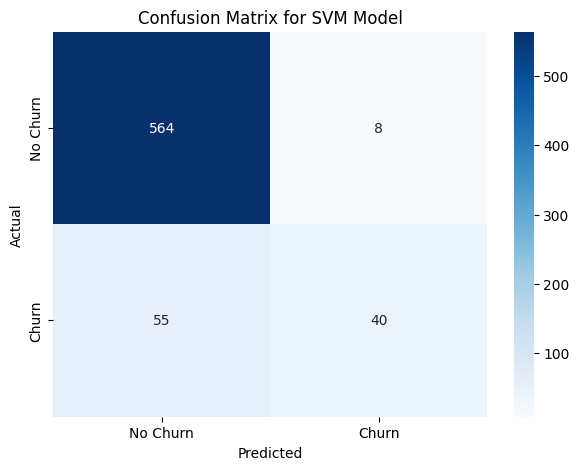

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

param_grid = {
    'C': [1],        # Regularization parameter
    'kernel': ['rbf'],  # Include other kernels
    'gamma': ['scale'],    # Kernel coefficient (applies to 'rbf', 'sigmoid', 'poly')
    'degree': [2]         # Degree of the polynomial kernel (applies only to 'poly')
}

svm = SVC(random_state=42,probability=True)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search.best_params_}")

# Get the best model
best_svm = grid_search.best_estimator_

# Predict on the test data
Y_pred_svm_no_smote = best_svm.predict(X_test_scaled)
y_probs_svm_no_smote = best_svm.predict_proba(X_test)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_svm_no_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_svm_no_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_svm_no_smote)}")

# explainer = shap.KernelExplainer(best_svm.predict_proba, Scaled_X_train)  # Pass model and background dataset
# shap_values = explainer.shap_values(Scaled_X_test)  # Get SHAP values for the test set

# # Plot the SHAP summary plot
# shap.summary_plot(shap_values, Scaled_X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred_svm_no_smote)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

with smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.5322338830584707
Confusion Matrix:
[[264 308]
 [  4  91]]
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.46      0.63       572
        True       0.23      0.96      0.37        95

    accuracy                           0.53       667
   macro avg       0.61      0.71      0.50       667
weighted avg       0.88      0.53      0.59       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


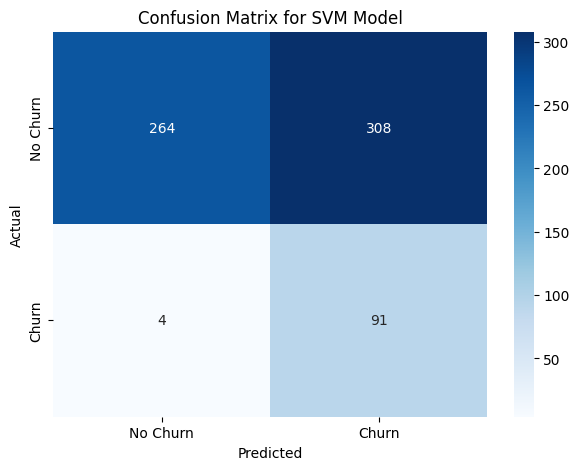

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

param_grid = {
    'C': [1],        # Regularization parameter
    'kernel': ['rbf'],  # Include other kernels
    'gamma': ['scale'],    # Kernel coefficient (applies to 'rbf', 'sigmoid', 'poly')
    'degree': [2]         # Degree of the polynomial kernel (applies only to 'poly')
}

svm = SVC(random_state=42,probability=True)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search.fit(X_train_resampled_scaled, Y_train_resampled)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search.best_params_}")

# Get the best model
best_svm = grid_search.best_estimator_

# Predict on the test data
Y_pred_svm_smote = best_svm.predict(X_test_scaled)
y_probs_svm_smote = best_svm.predict_proba(X_test)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_svm_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_svm_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_svm_smote)}")

# explainer = shap.KernelExplainer(best_svm.predict_proba, Scaled_X_train)  # Pass model and background dataset
# shap_values = explainer.shap_values(Scaled_X_test)  # Get SHAP values for the test set

# # Plot the SHAP summary plot
# shap.summary_plot(shap_values, Scaled_X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred_svm_smote)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.8800599700149925
Confusion Matrix:
[[506  66]
 [ 14  81]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.88      0.93       572
        True       0.55      0.85      0.67        95

    accuracy                           0.88       667
   macro avg       0.76      0.87      0.80       667
weighted avg       0.91      0.88      0.89       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


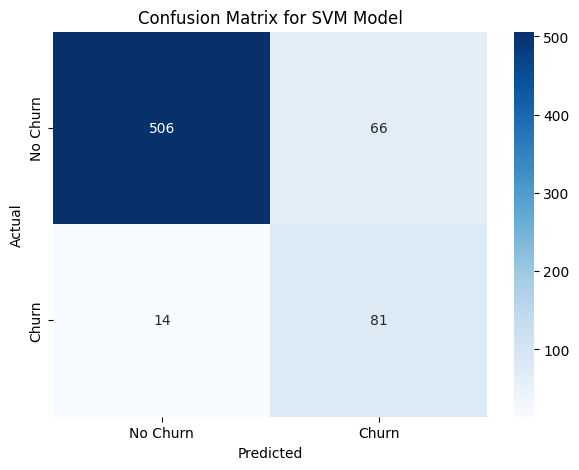

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

param_grid = {
    'C': [1],        # Regularization parameter
    'kernel': ['rbf'],  # Include other kernels
    'gamma': ['scale'],    # Kernel coefficient (applies to 'rbf', 'sigmoid', 'poly')
    'degree': [2]         # Degree of the polynomial kernel (applies only to 'poly')
}

svm = SVC(random_state=42,probability=True, class_weight='balanced')

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search.fit(X_train_featured_scaled, Y_train)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search.best_params_}")

# Get the best model
best_svm = grid_search.best_estimator_

# Predict on the test data
Y_pred_svm_featured = best_svm.predict(X_test_featured_scaled)
y_probs_svm_featured = best_svm.predict_proba(X_test_featured)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_svm_featured)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_svm_featured)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_svm_featured)}")

#explainer = shap.KernelExplainer(best_svm.predict_proba, X_train_featured_scaled)  # Pass model and background dataset
#shap_values = explainer.shap_values(X_test_featured_scaled)  # Get SHAP values for the test set

# # Plot the SHAP summary plot
#shap.summary_plot(shap_values, X_test_featured_scaled)

conf_matrix = confusion_matrix(Y_test, Y_pred_svm_featured)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

for this svm model we can interpret that using all thee data is the best approach.
using the model trained with smote is better for predicting churned clients
using the model trained without smote is better for predicting non-churned clients
so using a combination of these 2 models is optimal for our predictions

# **ROC SVM**

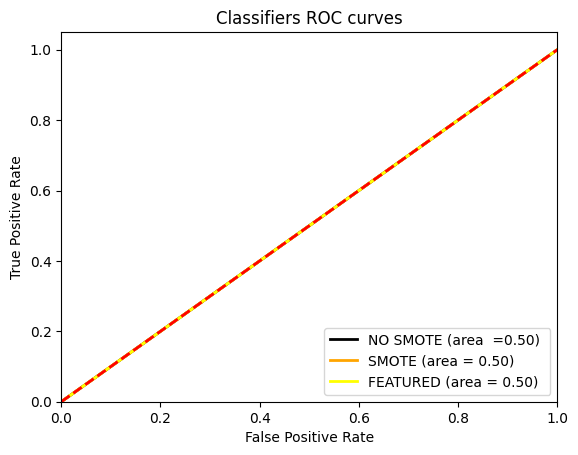

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_svm_smote_no_smote, tpr_svm_no_smote, threshold_no_smote = roc_curve(Y_test, y_probs_svm_no_smote)
roc_auc_svm_no_smote = auc(fpr_svm_smote_no_smote, tpr_svm_no_smote)
fpr_svm_smote_smote, tpr_svm_smote, threshold_smote = roc_curve(Y_test, y_probs_svm_smote)
roc_auc_svm_smote = auc(fpr_svm_smote_smote, tpr_svm_smote)
fpr_svm_smote_featured, tpr_svm_featured, threshold_featured = roc_curve(Y_test, y_probs_svm_featured)
roc_auc_svm_featured = auc(fpr_svm_smote_featured, tpr_svm_featured)
plt.plot(fpr_svm_smote_no_smote, tpr_svm_no_smote, color='black', lw=2, label=f'NO SMOTE (area  =%0.2f) '%roc_auc_svm_no_smote)
plt.plot(fpr_svm_smote_smote, tpr_svm_smote, color='orange', lw=2, label='SMOTE (area = %0.2f)'% roc_auc_svm_smote)
plt.plot(fpr_svm_smote_featured, tpr_svm_featured, color='yellow', lw=2, label='FEATURED (area = %0.2f)'% roc_auc_svm_featured)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

even though the 3 iteration of this model had a pretty high accuracy the roc curve indicates that this model is not applicable on our data and its use is the same as random guessing

# **Random Forest**

with no smote no featuring

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9565217391304348
Confusion Matrix:
[[570   2]
 [ 27  68]]
Classification Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       572
        True       0.97      0.72      0.82        95

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667



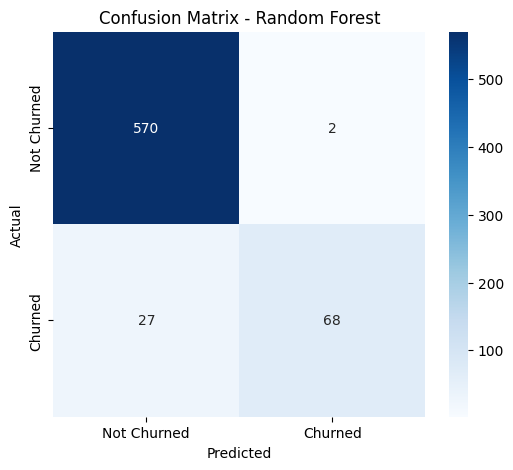

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100],          # Number of trees in the forest
    'max_depth': [None],         # Maximum depth of the tree
    'min_samples_split': [2],         # Minimum samples required to split a node
    'min_samples_leaf': [1],           # Minimum samples required at each leaf node
    'bootstrap': [False]               # Whether to use bootstrap samples when building trees
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search_rf.fit(X_train_scaled, Y_train)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search_rf.best_params_}")

# Get the best model
best_rf = grid_search_rf.best_estimator_

# Predict on the test data
Y_pred_rf_no_smote = best_rf.predict(X_test_scaled)
y_probs_rf_no_smote = best_rf.predict_proba(X_test_scaled)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_rf_no_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_rf_no_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_rf_no_smote)}")

# Visualize the confusion matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf_no_smote)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


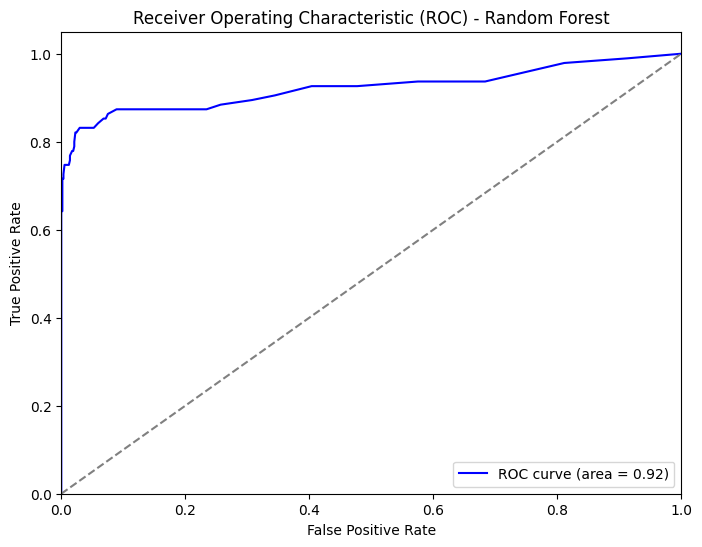

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_probs_rf_no_smote)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()


smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8590704647676162
Confusion Matrix:
[[507  65]
 [ 29  66]]
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92       572
        True       0.50      0.69      0.58        95

    accuracy                           0.86       667
   macro avg       0.72      0.79      0.75       667
weighted avg       0.88      0.86      0.87       667



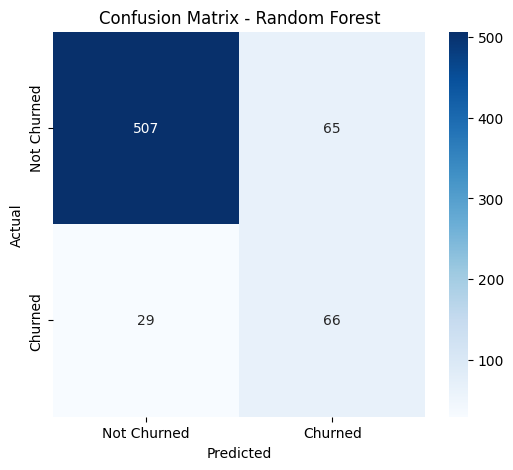

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100],  # number of trees
    'max_depth': [None],  # maximum depth of trees
    'min_samples_split': [2],  # minimum number of samples required to split a node
    'min_samples_leaf': [1],  # minimum number of samples required at each leaf node
    'bootstrap': [False]  # whether bootstrap samples are used when building trees
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search_rf.fit(X_train_resampled_scaled, Y_train_resampled)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search_rf.best_params_}")

# Get the best model
best_rf = grid_search_rf.best_estimator_

# Predict on the test data
Y_pred_rf_smote = best_rf.predict(X_test_scaled)
y_probs_rf_smote = best_rf.predict_proba(X_test_scaled)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_rf_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_rf_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_rf_smote)}")

# Visualize the confusion matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf_smote)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


featured

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8980509745127436
Confusion Matrix:
[[544  28]
 [ 40  55]]
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.95      0.94       572
        True       0.66      0.58      0.62        95

    accuracy                           0.90       667
   macro avg       0.80      0.76      0.78       667
weighted avg       0.89      0.90      0.90       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


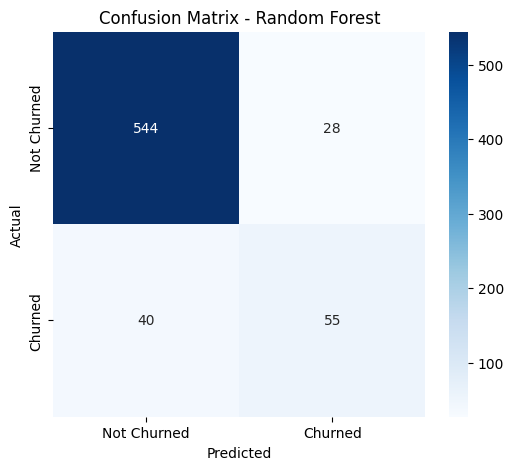

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100],  # number of trees
    'max_depth': [None],  # maximum depth of trees
    'min_samples_split': [2],  # minimum number of samples required to split a node
    'min_samples_leaf': [1],  # minimum number of samples required at each leaf node
    'bootstrap': [False]  # whether bootstrap samples are used when building trees
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search_rf.fit(X_train_featured_scaled, Y_train)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search_rf.best_params_}")

# Get the best model
best_rf = grid_search_rf.best_estimator_

# Predict on the test data
Y_pred_rf_featured = best_rf.predict(X_test_featured_scaled)
y_probs_rf_featured = best_rf.predict_proba(X_test_featured)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_rf_featured)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_rf_featured)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_rf_featured)}")

# Visualize the confusion matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf_featured)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


for this random forest model its better to work on non featured data while not using smote, since the model itself puts in mind the importance and the distribution of modalities

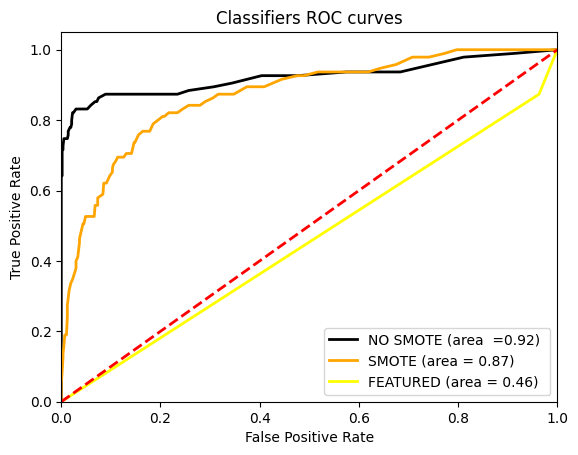

In [ ]:
fpr_rf_smote_no_smote, tpr_rf_no_smote, threshold_no_smote = roc_curve(Y_test, y_probs_rf_no_smote)
roc_auc_rf_no_smote = auc(fpr_rf_smote_no_smote, tpr_rf_no_smote)
fpr_rf_smote_smote, tpr_rf_smote, threshold_smote = roc_curve(Y_test, y_probs_rf_smote)
roc_auc_rf_smote = auc(fpr_rf_smote_smote, tpr_rf_smote)
fpr_rf_featured, tpr_rf_featured, threshold_featured = roc_curve(Y_test, y_probs_rf_featured)
roc_auc_rf_featured = auc(fpr_rf_featured, tpr_rf_featured)
plt.plot(fpr_rf_smote_no_smote, tpr_rf_no_smote, color='black', lw=2, label=f'NO SMOTE (area  =%0.2f) '%roc_auc_rf_no_smote)
plt.plot(fpr_rf_smote_smote, tpr_rf_smote, color='orange', lw=2, label='SMOTE (area = %0.2f)'% roc_auc_rf_smote)
plt.plot(fpr_rf_featured, tpr_rf_featured, color='yellow', lw=2, label='FEATURED (area = %0.2f)'% roc_auc_rf_featured)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

this model preforms well especially with raw data

# **KNN**

no smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 37, 'p': 1, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

Accuracy: 0.8575712143928036
Confusion Matrix:
[[572   0]
 [ 95   0]]
Classification Report:
              precision    recall  f1-score   support

       False       0.86      1.00      0.92       572
        True       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667



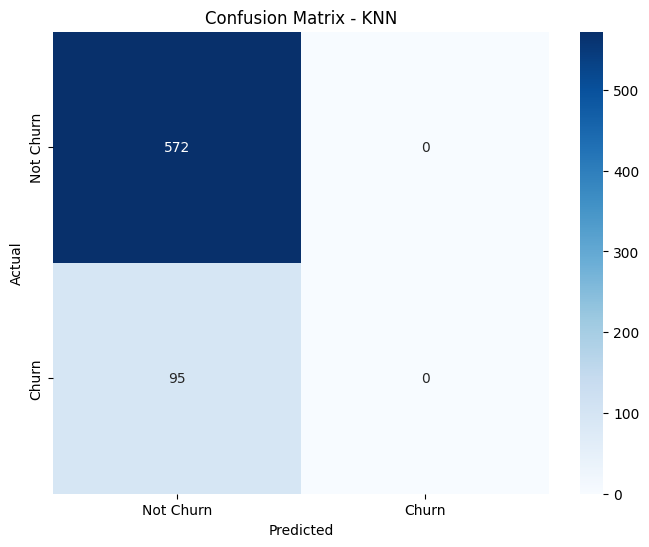

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [37],          # Number of neighbors to use
    'weights': ['uniform'],   # Weight function ('uniform' gives equal weight, 'distance' uses inverse distances)
    'metric': ['manhattan'],  # Distance metrics for nearest neighbor calculation
    'p': [1]                           # Parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, Y_train)

# Get the best KNN model
best_knn = grid_search.best_estimator_

# Display best parameters
print(f"Best parameters for KNN: {grid_search.best_params_}")

# Predict on the test data
Y_pred_knn_no_smote = best_knn.predict(X_test_scaled)
y_probs_knn_no_smote = best_knn.predict_proba(X_test)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_knn_no_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_knn_no_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_knn_no_smote)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_knn_no_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 37, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.3598200899550225
Confusion Matrix:
[[149 423]
 [  4  91]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.26      0.41       572
        True       0.18      0.96      0.30        95

    accuracy                           0.36       667
   macro avg       0.58      0.61      0.35       667
weighted avg       0.86      0.36      0.40       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


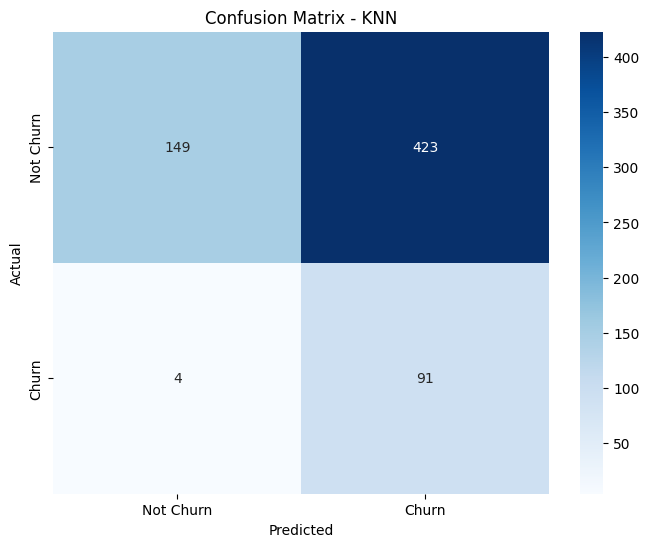

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [37],          # Number of neighbors to use
    'weights': ['uniform'],   # Weight function ('uniform' gives equal weight, 'distance' uses inverse distances)
    'metric': ['manhattan'],  # Distance metrics for nearest neighbor calculation
    'p': [1]                           # Parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled_scaled, Y_train_resampled)

# Get the best KNN model
best_knn = grid_search.best_estimator_

# Display best parameters
print(f"Best parameters for KNN: {grid_search.best_params_}")

# Predict on the test data
Y_pred_knn_smote = best_knn.predict(X_test_scaled)
y_probs_knn_smote = best_knn.predict_proba(X_test)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_knn_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_knn_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_knn_smote)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_knn_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


Text(0, 0.5, 'Score')

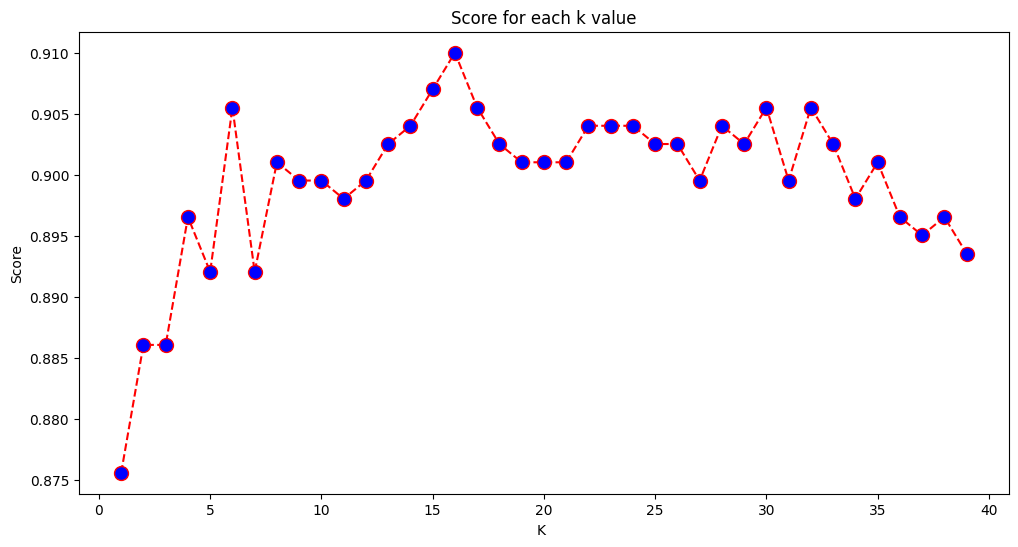

In [ ]:
score = []
# Calculate score for k between 1 and 40

for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train_featured_scaled, Y_train)
    pred_i = knn_model.predict(X_test_featured_scaled)
    score.append(knn_model.score(X_test_featured_scaled, Y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score for each k value')
plt.xlabel('K ')
plt.ylabel('Score')

featured

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 37, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.8950524737631185
Confusion Matrix:
[[563   9]
 [ 61  34]]
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94       572
        True       0.79      0.36      0.49        95

    accuracy                           0.90       667
   macro avg       0.85      0.67      0.72       667
weighted avg       0.89      0.90      0.88       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


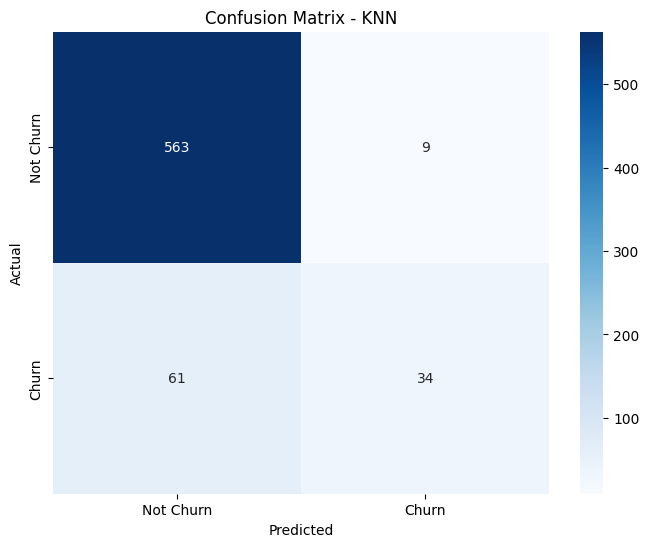

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [37],          # Number of neighbors to use
    'weights': ['uniform'],   # Weight function ('uniform' gives equal weight, 'distance' uses inverse distances)
    'metric': ['manhattan'],  # Distance metrics for nearest neighbor calculation
    'p': [1]                           # Parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_featured_scaled, Y_train)

# Get the best KNN model
best_knn = grid_search.best_estimator_

# Display best parameters
print(f"Best parameters for KNN: {grid_search.best_params_}")

# Predict on the test data
Y_pred_knn_featured = best_knn.predict(X_test_featured_scaled)
y_probs_knn_featured = best_knn.predict_proba(X_test_featured)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_knn_featured)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_knn_featured)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_knn_featured)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_knn_featured)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


same as svm

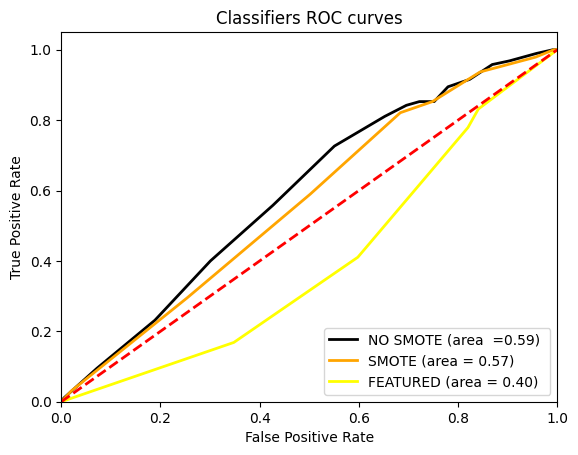

In [ ]:
fpr_knn_no_smote, tpr_knn_no_smote, threshold_no_smote = roc_curve(Y_test, y_probs_knn_no_smote)
roc_auc_knn_no_smote = auc(fpr_knn_no_smote, tpr_knn_no_smote)
fpr_knn_smote_smote, tpr_knn_smote, threshold_smote = roc_curve(Y_test, y_probs_knn_smote)
roc_auc_knn_smote = auc(fpr_knn_smote_smote, tpr_knn_smote)
fpr_knn_featured, tpr_knn_featured, threshold_featured = roc_curve(Y_test, y_probs_knn_featured)
roc_auc_knn_featured = auc(fpr_knn_featured, tpr_knn_featured)
plt.plot(fpr_knn_no_smote, tpr_knn_no_smote, color='black', lw=2, label=f'NO SMOTE (area  =%0.2f) '%roc_auc_knn_no_smote)
plt.plot(fpr_knn_smote_smote, tpr_knn_smote, color='orange', lw=2, label='SMOTE (area = %0.2f)'% roc_auc_knn_smote)
plt.plot(fpr_knn_featured, tpr_knn_featured, color='yellow', lw=2, label='FEATURED (area = %0.2f)'% roc_auc_knn_featured)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

knn preformed the best with raw data, this shows the clear difference between clusters

# **Logistic Regression**

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Logistic Regression: {'C': 0.1, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.8500749625187406
Confusion Matrix:
[[550  22]
 [ 78  17]]
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       572
        True       0.44      0.18      0.25        95

    accuracy                           0.85       667
   macro avg       0.66      0.57      0.59       667
weighted avg       0.81      0.85      0.82       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


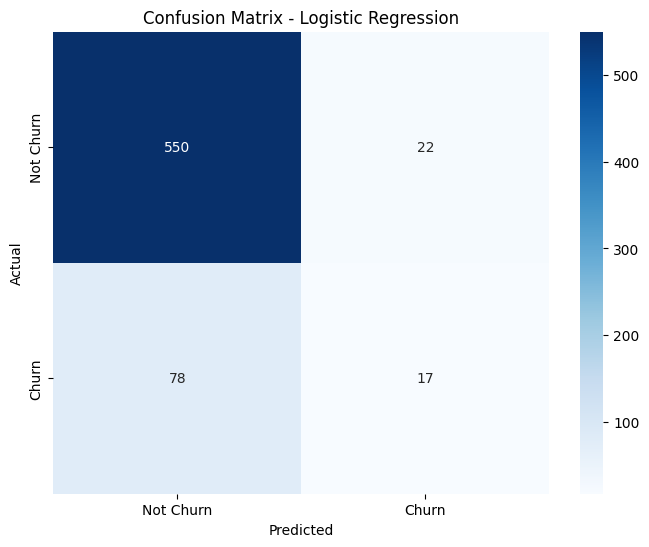

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid for GridSearchCV
param_grid_lr = {
    'C': [0.1],          # Regularization strength (smaller values = stronger regularization)
    'penalty': ['elasticnet'],  # Regularization types
    'solver': ['saga'],  # Optimization algorithms
    'max_iter': [100],           # Number of iterations for convergence
    'l1_ratio': [0.1]            # ElasticNet mixing parameter (only used with 'elasticnet')
}


# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, Y_train)

# Get the best Logistic Regression model
best_log_reg = grid_search.best_estimator_

# Display best parameters
print(f"Best parameters for Logistic Regression: {grid_search.best_params_}")

# Predict on the test data
Y_pred_lr_no_smote = best_log_reg.predict(X_test_scaled)
y_probs_lr_no_smote = best_log_reg.predict_proba(X_test)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_lr_no_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_lr_no_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_lr_no_smote)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_lr_no_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


predicitng most of the test sample as non-churning due to the imbalance in modelaities

smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Logistic Regression: {'C': 0.1, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.21739130434782608
Confusion Matrix:
[[ 51 521]
 [  1  94]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.09      0.16       572
        True       0.15      0.99      0.26        95

    accuracy                           0.22       667
   macro avg       0.57      0.54      0.21       667
weighted avg       0.86      0.22      0.18       667



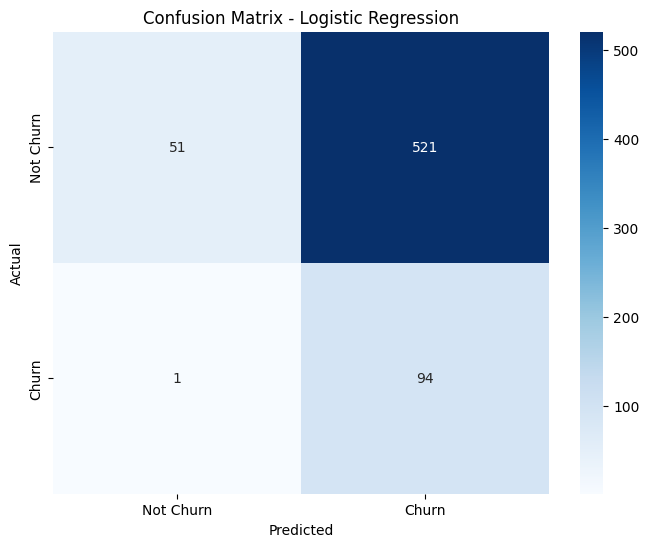

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1],          # Regularization strength (smaller values = stronger regularization)
    'penalty': ['elasticnet'],  # Regularization types
    'solver': ['saga'],  # Optimization algorithms
    'max_iter': [100],           # Number of iterations for convergence
    'l1_ratio': [0.1]            # ElasticNet mixing parameter (only used with 'elasticnet')
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled_scaled, Y_train_resampled)

# Get the best Logistic Regression model
best_log_reg = grid_search.best_estimator_

# Display best parameters
print(f"Best parameters for Logistic Regression: {grid_search.best_params_}")

# Predict on the test data
Y_pred_lr_smote = best_log_reg.predict(X_test_scaled)
y_probs_lr_smote = best_log_reg.predict_proba(X_test)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_lr_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_lr_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_lr_smote)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_lr_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


due to applying smote the model is predicitng most of the test sample as churning

featured

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Logistic Regression: {'C': 0.1, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.8470764617691154
Confusion Matrix:
[[549  23]
 [ 79  16]]
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.96      0.92       572
        True       0.41      0.17      0.24        95

    accuracy                           0.85       667
   macro avg       0.64      0.56      0.58       667
weighted avg       0.81      0.85      0.82       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


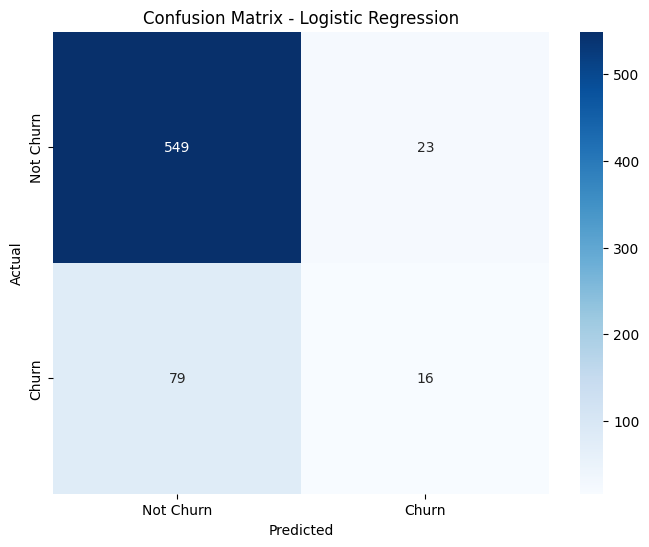

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1],          # Regularization strength (smaller values = stronger regularization)
    'penalty': ['elasticnet'],  # Regularization types
    'solver': ['saga'],  # Optimization algorithms
    'max_iter': [100],           # Number of iterations for convergence
    'l1_ratio': [0.1]  # Convergence iterations
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_featured_scaled, Y_train)

# Get the best Logistic Regression model
best_log_reg = grid_search.best_estimator_

# Display best parameters
print(f"Best parameters for Logistic Regression: {grid_search.best_params_}")

# Predict on the test data
Y_pred_lr_featured = best_log_reg.predict(X_test_featured_scaled)
y_probs_lr_featured = best_log_reg.predict_proba(X_test_featured)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_lr_featured)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_lr_featured)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_lr_featured)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_lr_featured)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


the same as before since this part is only for featured engeneering without smote

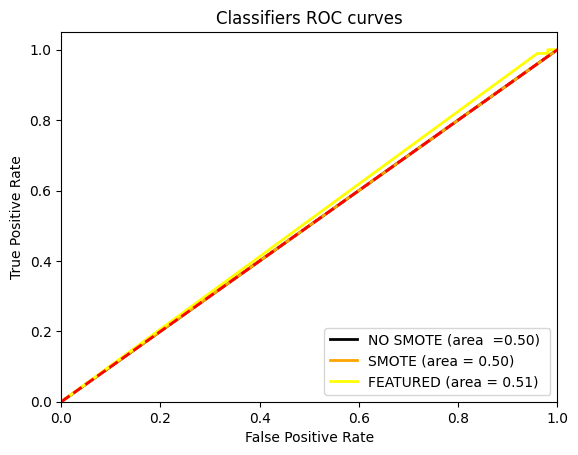

In [ ]:
fpr_lr_no_smote, tpr_lr_no_smote, threshold_no_smote = roc_curve(Y_test, y_probs_lr_no_smote)
roc_auc_lr_no_smote = auc(fpr_lr_no_smote, tpr_lr_no_smote)
fpr_lr_smote_smote, tpr_lr_smote, threshold_smote = roc_curve(Y_test, y_probs_lr_smote)
roc_auc_lr_smote = auc(fpr_lr_smote_smote, tpr_lr_smote)
fpr_lr_featured, tpr_lr_featured, threshold_featured = roc_curve(Y_test, y_probs_lr_featured)
roc_auc_lr_featured = auc(fpr_lr_featured, tpr_lr_featured)
plt.plot(fpr_lr_no_smote, tpr_lr_no_smote, color='black', lw=2, label=f'NO SMOTE (area  =%0.2f) '%roc_auc_lr_no_smote)
plt.plot(fpr_lr_smote_smote, tpr_lr_smote, color='orange', lw=2, label='SMOTE (area = %0.2f)'% roc_auc_lr_smote)
plt.plot(fpr_lr_featured, tpr_lr_featured, color='yellow', lw=2, label='FEATURED (area = %0.2f)'% roc_auc_lr_featured)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

the same as svm

# **Decision Tree**

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 0.9505247376311844
Confusion Matrix:
[[563   9]
 [ 24  71]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       572
        True       0.89      0.75      0.81        95

    accuracy                           0.95       667
   macro avg       0.92      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


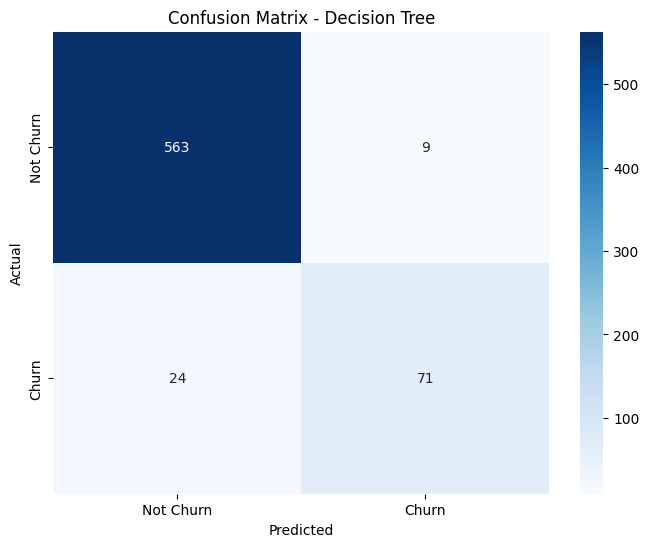

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Define parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini'],   # Splitting criteria
    'max_depth': [None],            # Maximum depth of the tree
    'min_samples_split': [2],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1],             # Minimum number of samples required to be at a leaf node
    'max_features': [None],        # Number of features to consider when looking for the best split
    'splitter': ['best'],                # How to choose the split at each node
    'max_leaf_nodes': [20]      # Maximum number of leaf nodes in the tree
}


# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, Y_train)

# Get the best Decision Tree model
best_decision_tree = grid_search.best_estimator_

# Display best parameters
print(f"Best parameters for Decision Tree: {grid_search.best_params_}")

# Predict on the test data
Y_pred_dt_no_smote = best_decision_tree.predict(X_test_scaled)
y_probs_dt_no_smote = best_decision_tree.predict_proba(X_test)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_dt_no_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_dt_no_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_dt_no_smote)}")



# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_dt_no_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 0.8290854572713643
Confusion Matrix:
[[473  99]
 [ 15  80]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.83      0.89       572
        True       0.45      0.84      0.58        95

    accuracy                           0.83       667
   macro avg       0.71      0.83      0.74       667
weighted avg       0.89      0.83      0.85       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


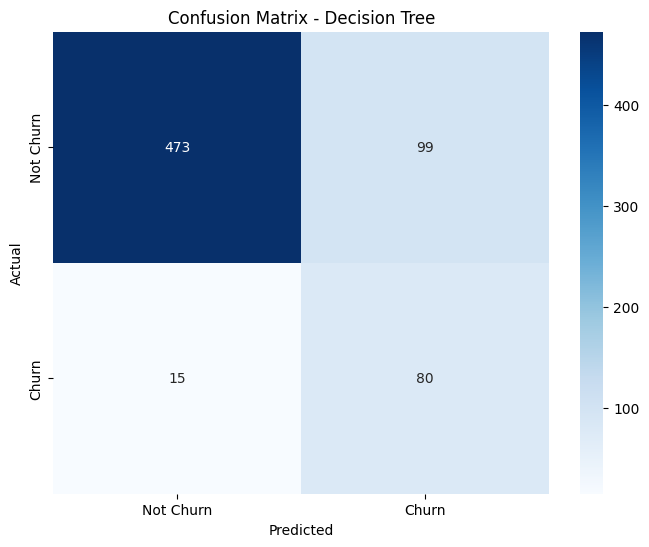

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Define parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini'],   # Splitting criteria
    'max_depth': [None],            # Maximum depth of the tree
    'min_samples_split': [2],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1],             # Minimum number of samples required to be at a leaf node
    'max_features': [None],        # Number of features to consider when looking for the best split
    'splitter': ['best'],                # How to choose the split at each node
    'max_leaf_nodes': [20]      # Maximum number of leaf nodes in the tree
}

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled_scaled, Y_train_resampled)

# Get the best Decision Tree model
best_decision_tree = grid_search.best_estimator_

# Display best parameters
print(f"Best parameters for Decision Tree: {grid_search.best_params_}")

# Predict on the test data
Y_pred_dt_smote = best_decision_tree.predict(X_test_scaled)
y_probs_dt_smote = best_decision_tree.predict_proba(X_test)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_dt_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_dt_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_dt_smote)}")



# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_dt_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


featured

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 0.9010494752623688
Confusion Matrix:
[[546  26]
 [ 40  55]]
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.95      0.94       572
        True       0.68      0.58      0.62        95

    accuracy                           0.90       667
   macro avg       0.81      0.77      0.78       667
weighted avg       0.90      0.90      0.90       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


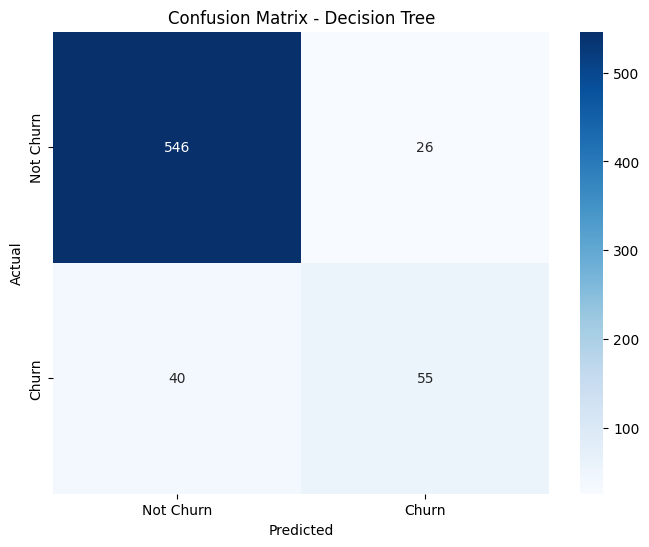

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Define parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini'],   # Splitting criteria
    'max_depth': [None],            # Maximum depth of the tree
    'min_samples_split': [2],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1],             # Minimum number of samples required to be at a leaf node
    'max_features': [None],        # Number of features to consider when looking for the best split
    'splitter': ['best'],                # How to choose the split at each node
    'max_leaf_nodes': [20]      # Maximum number of leaf nodes in the tree
}

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_featured_scaled, Y_train)

# Get the best Decision Tree model
best_decision_tree = grid_search.best_estimator_

# Display best parameters
print(f"Best parameters for Decision Tree: {grid_search.best_params_}")

# Predict on the test data
Y_pred_dt_featured = best_decision_tree.predict(X_test_featured_scaled)
y_probs_dt_featured = best_decision_tree.predict_proba(X_test_featured)[:,1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_dt_featured)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_dt_featured)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_dt_featured)}")



# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_dt_featured)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


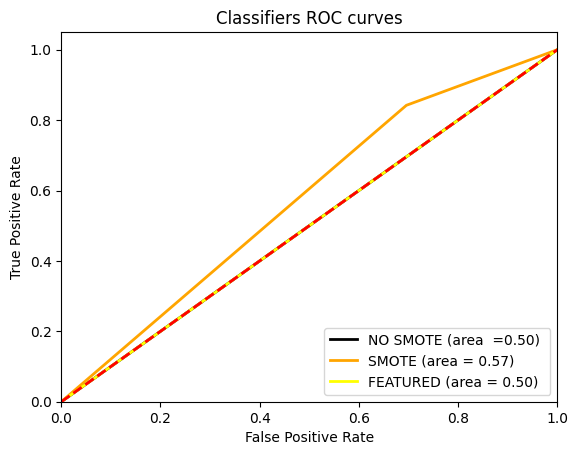

In [ ]:
fpr_tree_no_smote, tpr_tree_no_smote, threshold_no_smote = roc_curve(Y_test, y_probs_dt_no_smote)
roc_auc_tree_no_smote = auc(fpr_tree_no_smote, tpr_tree_no_smote)
fpr_tree_smote_smote, tpr_tree_smote, threshold_smote = roc_curve(Y_test, y_probs_dt_smote)
roc_auc_tree_smote = auc(fpr_tree_smote_smote, tpr_tree_smote)
fpr_tree_featured, tpr_tree_featured, threshold_featured = roc_curve(Y_test, y_probs_dt_featured)
roc_auc_tree_featured = auc(fpr_tree_featured, tpr_tree_featured)
plt.plot(fpr_tree_no_smote, tpr_tree_no_smote, color='black', lw=2, label=f'NO SMOTE (area  =%0.2f) '%roc_auc_tree_no_smote)
plt.plot(fpr_tree_smote_smote, tpr_tree_smote, color='orange', lw=2, label='SMOTE (area = %0.2f)'% roc_auc_tree_smote)
plt.plot(fpr_tree_featured, tpr_tree_featured, color='yellow', lw=2, label='FEATURED (area = %0.2f)'% roc_auc_tree_featured)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

for this model using smote on our data is the best approach,
however this impovement of performance was at the cost of the accuracy so we should avoid this model

# **GBM**

no smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'learning_rate': 0.2, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9610194902548725
Confusion Matrix:
[[569   3]
 [ 23  72]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       572
        True       0.96      0.76      0.85        95

    accuracy                           0.96       667
   macro avg       0.96      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


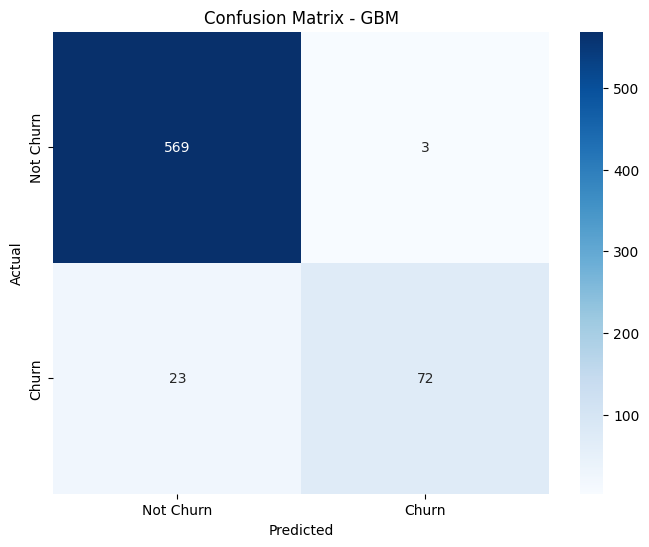

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameters to tune
param_grid_gbm = {
    'n_estimators': [100],        # Test different numbers of boosting stages
    'learning_rate': [0.2],      # Step size shrinkage to balance speed and accuracy
    'max_depth': [8],                # Varying tree depth for different levels of complexity
    'min_samples_split': [2],       # Minimum samples required to split an internal node
    'min_samples_leaf': [5],         # Minimum samples required at a leaf node
}

# Initialize Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search_gbm.fit(X_train_scaled, Y_train)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search_gbm.best_params_}")

# Get the best model
best_gbm = grid_search_gbm.best_estimator_

# Predict on the test data
Y_pred_gbm_no_smote = best_gbm.predict(X_test_scaled)
y_probs_gbm_no_smote = best_gbm.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_gbm_no_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_gbm_no_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_gbm_no_smote)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_gbm_no_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GBM")
plt.show()


smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'learning_rate': 0.2, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8740629685157422
Confusion Matrix:
[[510  62]
 [ 22  73]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.89      0.92       572
        True       0.54      0.77      0.63        95

    accuracy                           0.87       667
   macro avg       0.75      0.83      0.78       667
weighted avg       0.90      0.87      0.88       667



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


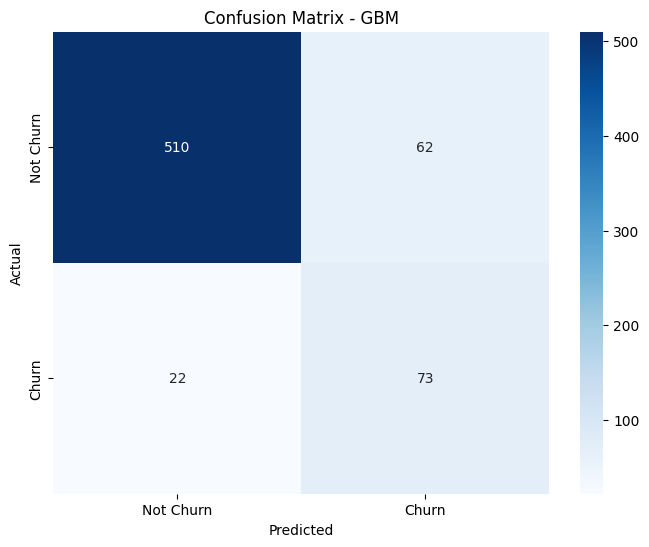

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameters to tune
param_grid_gbm = {
    'n_estimators': [100],        # Test different numbers of boosting stages
    'learning_rate': [0.2],      # Step size shrinkage to balance speed and accuracy
    'max_depth': [8],                # Varying tree depth for different levels of complexity
    'min_samples_split': [2],       # Minimum samples required to split an internal node
    'min_samples_leaf': [5],         # Minimum samples required at a leaf node
}

# Initialize Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search_gbm.fit(X_train_resampled_scaled, Y_train_resampled)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search_gbm.best_params_}")

# Get the best model
best_gbm = grid_search_gbm.best_estimator_

# Predict on the test data
Y_pred_gbm_smote = best_gbm.predict(X_test_scaled)
y_probs_gbm_smote = best_gbm.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_gbm_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_gbm_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_gbm_smote)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_gbm_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GBM")
plt.show()


featured

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'learning_rate': 0.2, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9010494752623688
Confusion Matrix:
[[546  26]
 [ 40  55]]
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.95      0.94       572
        True       0.68      0.58      0.62        95

    accuracy                           0.90       667
   macro avg       0.81      0.77      0.78       667
weighted avg       0.90      0.90      0.90       667



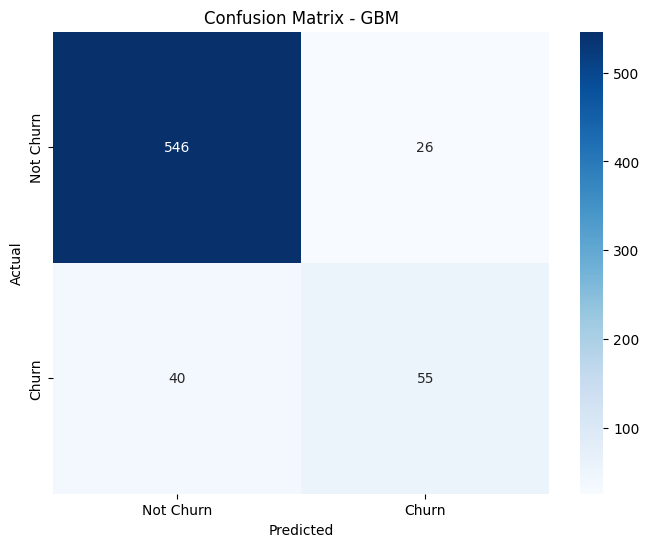

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameters to tune
param_grid_gbm = {
    'n_estimators': [100],        # Test different numbers of boosting stages
    'learning_rate': [0.2],      # Step size shrinkage to balance speed and accuracy
    'max_depth': [8],                # Varying tree depth for different levels of complexity
    'min_samples_split': [2],       # Minimum samples required to split an internal node
    'min_samples_leaf': [5],         # Minimum samples required at a leaf node
}

# Initialize Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search_gbm.fit(X_train_featured_scaled, Y_train)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search_gbm.best_params_}")

# Get the best model
best_gbm = grid_search_gbm.best_estimator_

# Predict on the test data
Y_pred_gbm_featured = best_gbm.predict(X_test_featured_scaled)
y_probs_gbm_featured = best_gbm.predict_proba(X_test_featured_scaled)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_gbm_featured)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_gbm_featured)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_gbm_featured)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_gbm_featured)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GBM")
plt.show()


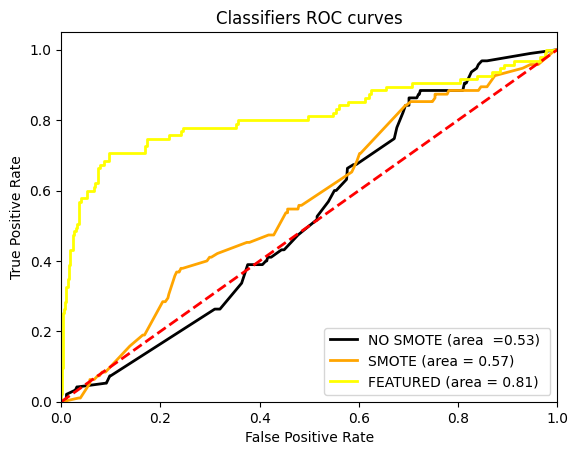

In [ ]:
fpr_gbm_no_smote, tpr_gbm_no_smote, threshold_no_smote = roc_curve(Y_test, y_probs_gbm_no_smote)
roc_auc_gbm_no_smote = auc(fpr_gbm_no_smote, tpr_gbm_no_smote)
fpr_gbm_smote_smote, tpr_gbm_smote, threshold_smote = roc_curve(Y_test, y_probs_gbm_smote)
roc_auc_gbm_smote = auc(fpr_gbm_smote_smote, tpr_gbm_smote)
fpr_gbm_featured, tpr_gbm_featured, threshold_featured = roc_curve(Y_test, y_probs_gbm_featured)
roc_auc_gbm_featured = auc(fpr_gbm_featured, tpr_gbm_featured)
plt.plot(fpr_gbm_no_smote, tpr_gbm_no_smote, color='black', lw=2, label=f'NO SMOTE (area  =%0.2f) '%roc_auc_gbm_no_smote)
plt.plot(fpr_gbm_smote_smote, tpr_gbm_smote, color='orange', lw=2, label='SMOTE (area = %0.2f)'% roc_auc_gbm_smote)
plt.plot(fpr_gbm_featured, tpr_gbm_featured, color='yellow', lw=2, label='FEATURED (area = %0.2f)'% roc_auc_gbm_featured)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

this model preformed best with featured data

# **XGBoost**

no smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.9220389805097451
Confusion Matrix:
[[551  21]
 [ 31  64]]
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.96      0.95       572
        True       0.75      0.67      0.71        95

    accuracy                           0.92       667
   macro avg       0.85      0.82      0.83       667
weighted avg       0.92      0.92      0.92       667



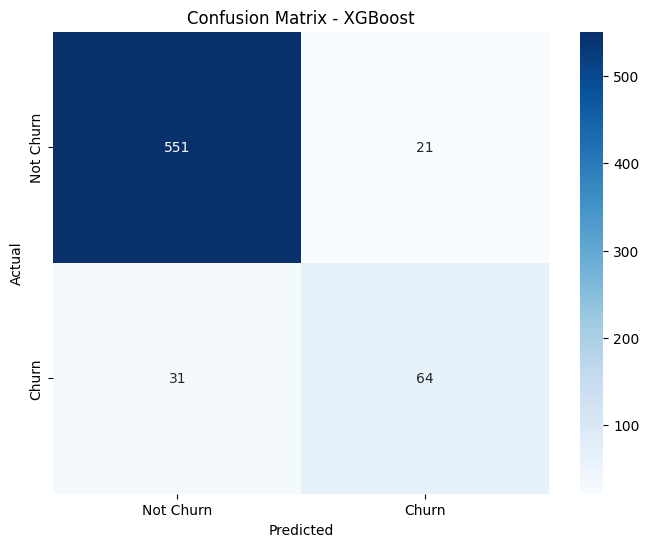

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [200],
    'learning_rate': [0.05],
    'max_depth': [8],
    'min_child_weight': [5],
    'gamma': [0],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
}

# Initialize XGBoost model with GPU
xgb = XGBClassifier(tree_method='hist', random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search_xgb.fit(X_train_scaled, Y_train)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search_xgb.best_params_}")

# Get the best model
best_xgb = grid_search_xgb.best_estimator_


# Predict on the test data
Y_pred_xgb_no_smote = best_xgb.predict(X_test_scaled)
y_probs_xgb_no_smote = best_xgb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_xgb_no_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_xgb_no_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_xgb_no_smote)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_xgb_no_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.1454272863568216
Confusion Matrix:
[[  2 570]
 [  0  95]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.00      0.01       572
        True       0.14      1.00      0.25        95

    accuracy                           0.15       667
   macro avg       0.57      0.50      0.13       667
weighted avg       0.88      0.15      0.04       667



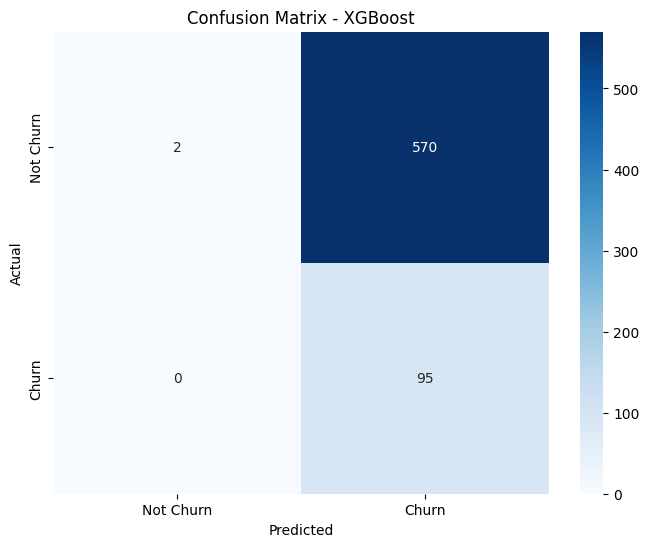

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [200],
    'learning_rate': [0.05],
    'max_depth': [8],
    'min_child_weight': [5],
    'gamma': [0],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
}

# Initialize XGBoost model with GPU
xgb = XGBClassifier(tree_method='hist', random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search_xgb.fit(X_train_resampled_scaled, Y_train_resampled)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search_xgb.best_params_}")

# Get the best model
best_xgb = grid_search_xgb.best_estimator_


# Predict on the test data
Y_pred_xgb_smote = best_xgb.predict(X_test_scaled)
y_probs_xgb_smote = best_xgb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_xgb_smote)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_xgb_smote)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_xgb_smote)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_xgb_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

adding smote made the model is opting to prediction most of the testing sample as churning

featured

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters from Grid Search: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8995502248875562
Confusion Matrix:
[[545  27]
 [ 40  55]]
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.95      0.94       572
        True       0.67      0.58      0.62        95

    accuracy                           0.90       667
   macro avg       0.80      0.77      0.78       667
weighted avg       0.89      0.90      0.90       667



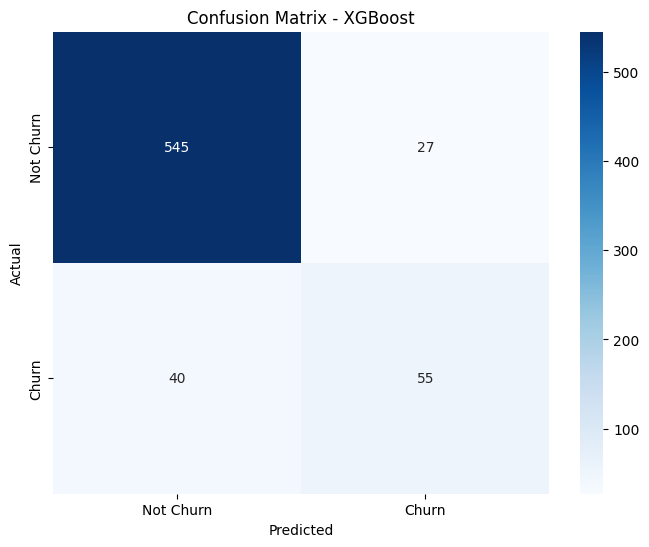

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [200],
    'learning_rate': [0.05],
    'max_depth': [8],
    'min_child_weight': [5],
    'gamma': [0],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
}

# Initialize XGBoost model with GPU
xgb = XGBClassifier(tree_method='hist', random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search_xgb.fit(X_train_featured_scaled, Y_train)

# Best parameters from GridSearchCV
print(f"Best parameters from Grid Search: {grid_search_xgb.best_params_}")

# Get the best model
best_xgb = grid_search_xgb.best_estimator_


# Predict on the test data
Y_pred_xgb_featured = best_xgb.predict(X_test_featured_scaled)
y_probs_xgb_featured = best_xgb.predict_proba(X_test_featured)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_xgb_featured)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred_xgb_featured)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred_xgb_featured)}")

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_xgb_featured)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

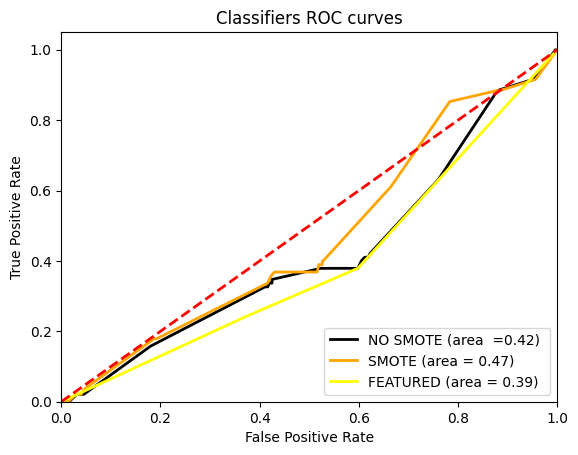

In [ ]:
fpr_xgb_no_smote, tpr_xgb_no_smote, threshold_no_smote = roc_curve(Y_test, y_probs_xgb_no_smote)
roc_auc_xgb_no_smote = auc(fpr_xgb_no_smote, tpr_xgb_no_smote)
fpr_xgb_smote_smote, tpr_xgb_smote, threshold_smote = roc_curve(Y_test, y_probs_xgb_smote)
roc_auc_xgb_smote = auc(fpr_xgb_smote_smote, tpr_xgb_smote)
fpr_xgb_featured, tpr_xgb_featured, threshold_featured = roc_curve(Y_test, y_probs_xgb_featured)
roc_auc_xgb_featured = auc(fpr_xgb_featured, tpr_xgb_featured)
plt.plot(fpr_xgb_no_smote, tpr_xgb_no_smote, color='black', lw=2, label=f'NO SMOTE (area  =%0.2f) '%roc_auc_xgb_no_smote)
plt.plot(fpr_xgb_smote_smote, tpr_xgb_smote, color='orange', lw=2, label='SMOTE (area = %0.2f)'% roc_auc_xgb_smote)
plt.plot(fpr_xgb_featured, tpr_xgb_featured, color='yellow', lw=2, label='FEATURED (area = %0.2f)'% roc_auc_xgb_featured)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

using featured data is the best for this model

We also did the deployement of our best model which is randomForest that we will show during our presentation